# Modified Auto Contrast link https://youtu.be/lRNt6CpkrbU

In [1]:
 
import numpy as np

def histogram(img):
    height = img.shape[0]
    width = img.shape[1]
    
    hist = np.zeros((256))

    for i in np.arange(height):
        for j in np.arange(width):
            a = img.item(i,j)
            hist[a] += 1
            
    return hist

In [2]:
import numpy as np

def cumulative_histogram(hist):
    cum_hist = hist.copy()
    
    for i in np.arange(1, 256):
        cum_hist[i] = cum_hist[i-1] + cum_hist[i]
        
    return cum_hist

In [9]:
import numpy as np
import cv2

#import histogram as h
#import cumulative_histogram as ch

img = cv2.imread('norm_img.jpg', cv2.IMREAD_GRAYSCALE)

height = img.shape[0]
width = img.shape[1]
pixels = width * height

hist= histogram(img)
cum_hist = cumulative_histogram(hist)

p = 0.05

a_low = 0
for i in np.arange(256):
    if cum_hist[i] >= pixels * p:
        a_low = i
        break
    
a_high = 255
for i in np.arange(255, -1, -1):
    if cum_hist[i] <= pixels * (1 - p):
        a_high = i
        break
for i in np.arange(height):
    for j in np.arange(width):
        a = img.item(i,j)
        b = 0
        if a <= a_low:
            b = 0
        elif a >= a_high:
            b = 255
        else:
            b = float(a - a_low) / (a_high - a_low) * 255
        img.itemset((i,j), b)

cv2.imwrite('images/modified_auto_contrast.jpg', img)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
from PIL import Image,  ImageEnhance

In [3]:
from PIL import ImageEnhance

In [4]:
img_path = '/home/harsh/amk/GOOD_BAD_ND_MausumiData/BAD/1600.png'

In [5]:
image = Image.open(img_path)
#size = width, height = Image.size
enhancer = ImageEnhance.Sharpness(image)

In [6]:
imge = enhancer.enhance(6.0)

In [8]:
type(imge)

PIL.Image.Image

In [9]:
arr_img = array(imge)

In [11]:
arr_img = cv2.cvtColor(arr_img, cv2.COLOR_RGB2BGR)
cv2.imshow("ok", arr_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [88]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [89]:
img_min = np.min(img)

In [90]:
img_max = np.max(img)

In [91]:
img.shape[0]

1958

In [94]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        cs = (img[i][j] - img_min)/(img_max - img_min)
        img[i][j] = cs

In [2]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'img' is not defined

In [1]:
img_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/image020.png'

In [27]:
img = cv2.imread(img_path)
img.shape

(1152, 1500, 3)

In [36]:
img[800][670]

array([ 25,  72, 135], dtype=uint8)

In [25]:
from tqdm import tqdm

In [37]:
import cv2
import numpy as np
 
# Read the image
ori_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#img = cv2.imread(img_path) 
# Create zeros array to store the stretched image
minmax_img = img
img_max = np.max(img)
img_min = np.min(img)
img_shape = img.shape
# Loop over the image and apply Min-Max formulae
for i in tqdm(range(img_shape[0])):
    for j in range(img_shape[1]):
        for k in range(img_shape[2]):
            minmax_img[i,j,k] = 255*((img[i][j][k] - img_min)/(img_max - img_min))
 
# Displat the stretched image
minmax_img = cv2.resize(minmax_img, (512,512))
ori_img = cv2.resize(img, (512,512))
cv2.imshow('Minmax',minmax_img)
cv2.imshow('original image',ori_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

100%|██████████| 1152/1152 [00:15<00:00, 72.64it/s]


In [ ]:
color_image = cv2.cvtColor(minmax_img, cv2.COLOR_GRAY2BGR)
cv2.imshow('color_image',color_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
from PIL import Image, ImageEnhance 
im = Image.open(img_path)
enhancer = ImageEnhance.Contrast(im)
enhanced_im = enhancer.enhance(1.4)
enhanced_im.save("enhanced_img.png")

In [49]:
im = Image.open("enhanced_img.png")

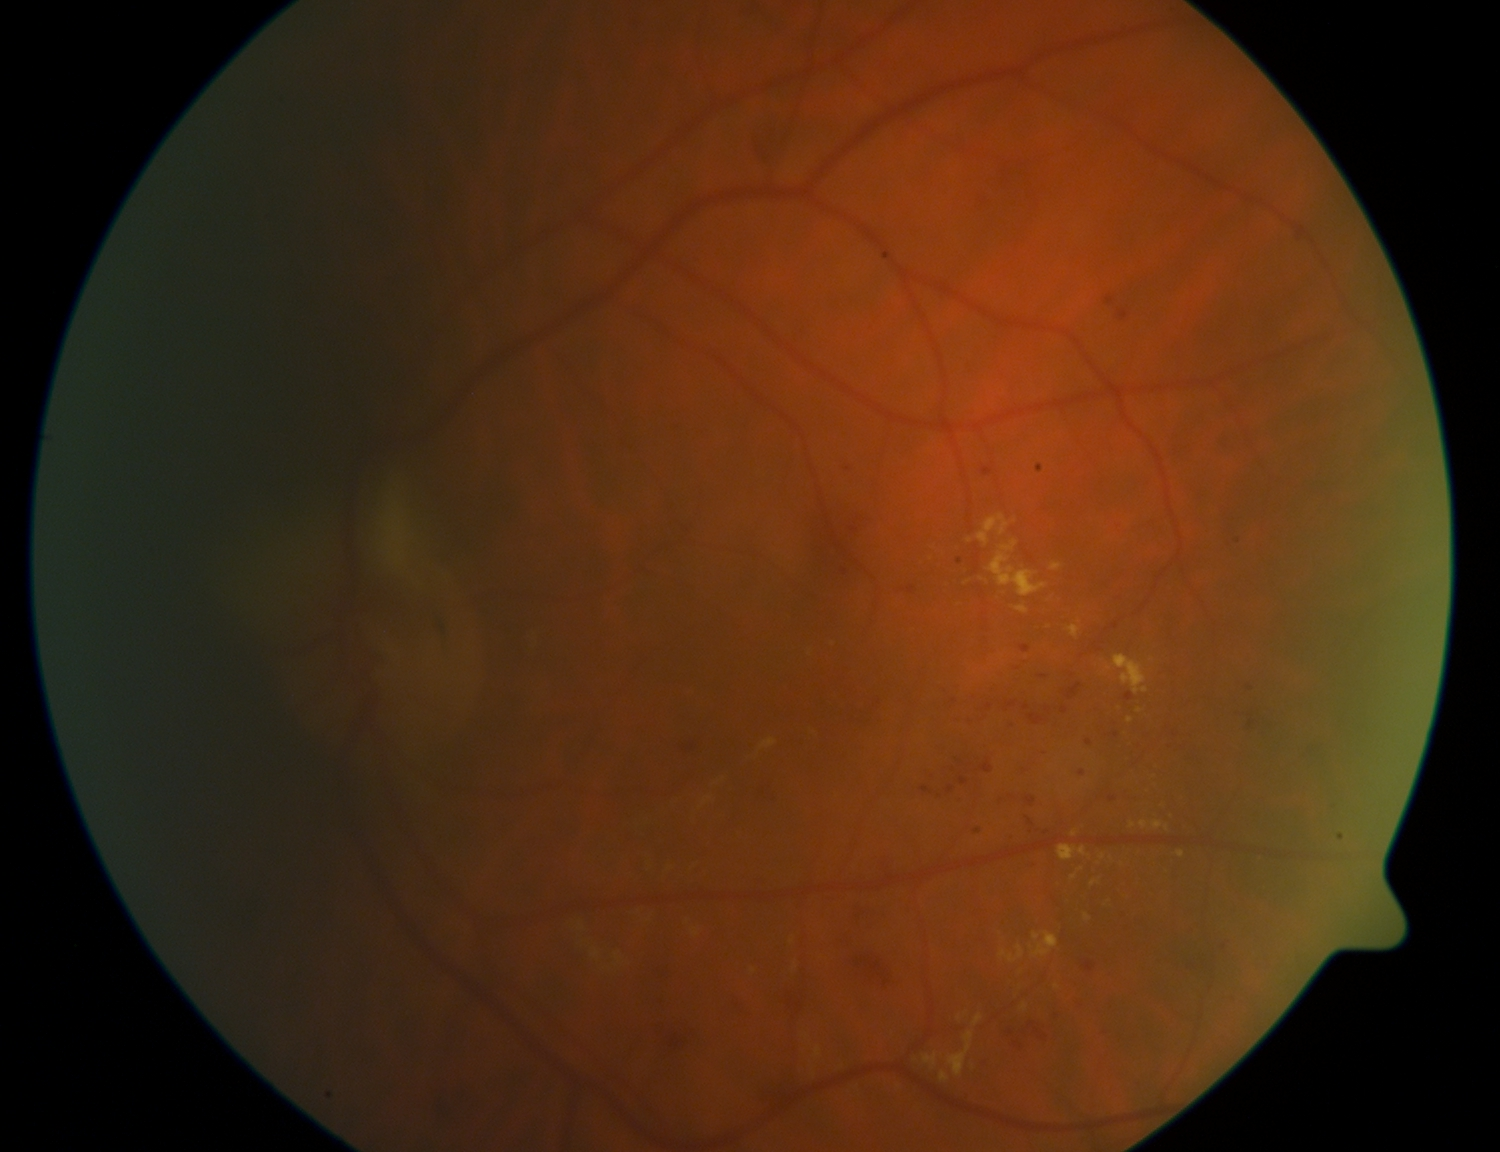

In [41]:
im = Image.open(img_path)
im

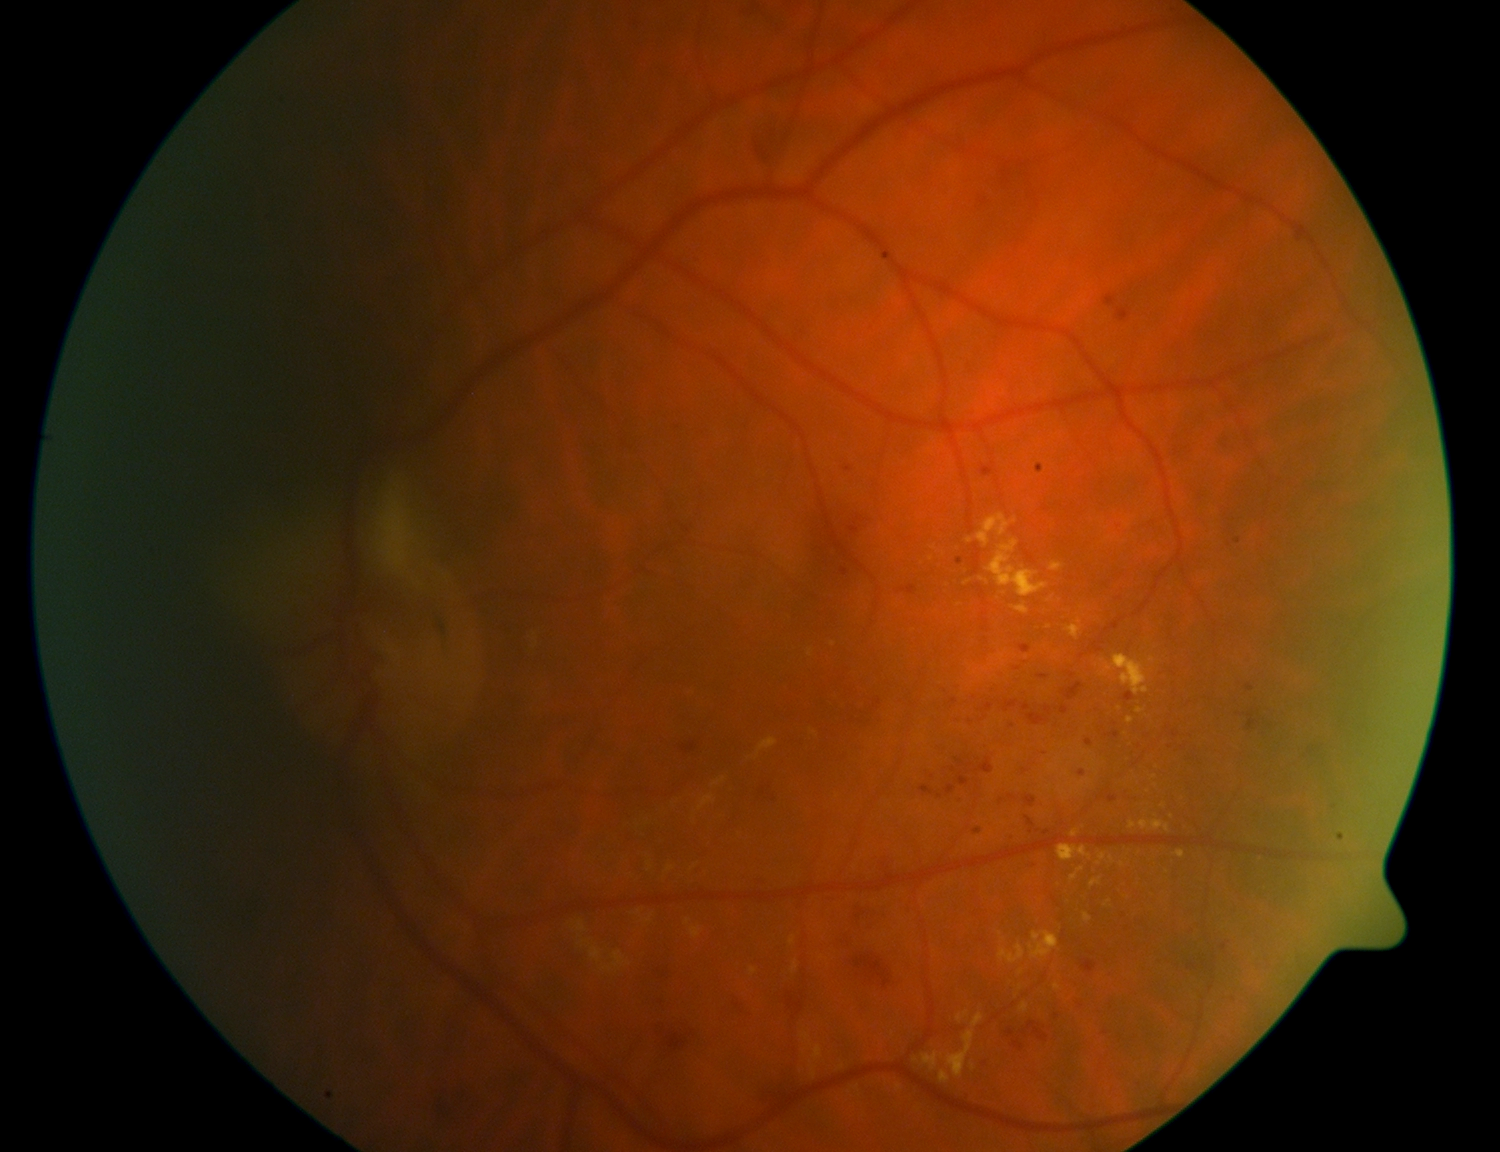

In [50]:
im

In [36]:
imge = enhancer.enhance(2.0)
cv2.imshow('image', imge)
cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: Expected Ptr<cv::UMat> for argument '%s'

In [40]:
img = cv2.imread(img_path)

In [50]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [65]:
laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()

In [66]:
gaussian_var = cv2.GaussianBlur(img, (3,3), cv2.BORDER_DEFAULT).var()

In [68]:
laplacian_var

14.557588018118098

In [74]:
laplacian_var = []
gaussian_var = []
good_img_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/*'
bad_img_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/*'
for i, img_path in enumerate(tqdm(glob.glob(good_img_path)+glob.glob(bad_img_path))):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    laplacian_var.append(cv2.Laplacian(img, cv2.CV_64F).var())
    bilateralfilter.append(cv2.bilateralFilter(res,15,75,75))
    median.append(cv2.medianBlur(res,15).var())
    gaussian_var.append(cv2.GaussianBlur(img, (5,5), cv2.BORDER_DEFAULT).var())

100%|██████████| 1900/1900 [03:18<00:00,  9.56it/s]


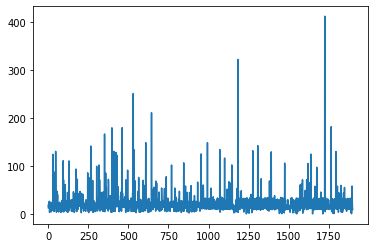

In [75]:
import matplotlib.pyplot as plt
plt.plot(range(1900),laplacian_var)

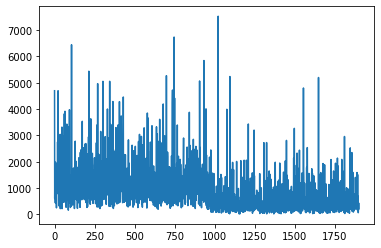

In [76]:
plt.plot(range(1900),gaussian_var)

In [9]:
image = Image.open('/home/harsh/amk/quality_check_dataset/Test/Bad Quality/DRPR  VENKATAMMA_V_01-01-1955_0957_(0005).jpg')

In [13]:
img.show()

In [11]:
img = Image.open('/home/harsh/amk/quality_check_dataset/Test/Bad Quality/DRPR  VENKATAMMA_V_01-01-1955_0957_(0005).jpg')
exif_data = img._getexif()

In [52]:
torch.cuda.set_device(device)

NameError: name 'torch' is not defined

In [17]:
import cv2
import numpy as np

In [21]:
img_path = '/home/harsh/amk/quality_check_dataset/Test/Bad Quality/DRPR  VENKATAMMA_V_01-01-1955_0957_(0005).jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (512, 512)) 
cv2.imshow("Original",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from PIL import Image
import numpy
im = Image.open("sample2.png")
np_im = numpy.array(im)
print np_im.shape

In [ ]:
np_im = np_im - 18
new_im = Image.fromarray(np_im)
new_im.save("numpy_altered_sample2.png")

In [ ]:
'/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/image020.png'

In [1]:
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
inp_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/*'
for i, img_path in enumerate(tqdm(glob.glob(inp_path))):
    im = cv2.imread(img_path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY).flatten()

    sns.distplot(im)

    plt.show()

NameError: name 'tqdm' is not defined

In [28]:
from PIL import Image
from PIL import ImageEnhance
import numpy as np
import cv2

image = Image.open('/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/0004CR0D (9).jpg')
#image = image.resize((512, 512)) 
#image.show()
#img_arr = np.array(image)
#cv2.imshow("Original Image",img_arr)


enh_bri = ImageEnhance.Brightness(image)
brightness = 7
image_brightened = enh_bri.enhance(brightness)
image_brightened.show()
#image_brightened = np.array(image_brightened)
#cv2.imshow("image_brightened",image_brightened)


enh_col = ImageEnhance.Color(image)
color = 5
image_colored = enh_col.enhance(color)
image_colored.show()

enh_con = ImageEnhance.Contrast(image)
contrast = 2.5
image_contrasted = enh_con.enhance(contrast)
image_contrasted.show()

enh_sha = ImageEnhance.Sharpness(image)
sharpness = 5
image_sharped = enh_sha.enhance(sharpness)
image_sharped.show()

'''

enh_col = ImageEnhance.Color(image)
color = 5
image_colored = enh_col.enhance(color)
image_colored = np.array(image_colored)
cv2.imshow("image_colored",image_colored)
'''
'''
enh_con = ImageEnhance.Contrast(image)
contrast = 2.5
image_contrasted = enh_con.enhance(contrast)
image_contrasted.show()
#image_contrasted = np.array(image_contrasted)
#cv2.imshow("image_contrasted",image_contrasted)

enh_sha = ImageEnhance.Sharpness(image)
sharpness = 5
image_sharped = enh_sha.enhance(sharpness)
image_sharped = np.array(image_sharped)
cv2.imshow("image_sharped",image_sharped)

sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(img_arr, -1, sharpen_kernel)

cv2.imshow('sharpen', sharpen)
'''
cv2.waitKey(0)
cv2.destroyAllWindows()


In [21]:
cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

TypeError: Expected Ptr<cv::UMat> for argument '%s'

In [6]:
import cv2
img_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/3170_right.jpeg'

bgr = cv2.imread(img_path)


img_bgr = cv2.resize(bgr, (512,512))

lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(5,5))

lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
cv2.imshow("original image", img_bgr)
cv2.imshow("Clahe image applied", bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [8]:

# Load the image
img1 = cv2.imread(img_path, 0)
# Structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(25,25))
# Apply the top hat transform
tophat = cv2.morphologyEx(img1, cv2.MORPH_TOPHAT, kernel)
# Apply the black hat transform
blackhat = cv2.morphologyEx(img1, cv2.MORPH_BLACKHAT, kernel)

cv2.imshow("Clahe image applied", tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
import numpy as np
from PIL import Image

img = Image.open('/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/image020.png')
lr_img = np.array(img).to(device)

AttributeError: 'numpy.ndarray' object has no attribute 'to'

In [54]:
import tensorflow as tf

In [63]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [65]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.keras.backend.set_session(tf.Session(config=config))

In [57]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

# ISR

In [1]:
import ISR

In [4]:
import numpy as np
from PIL import Image

img = Image.open('/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/image020.png')
lr_img = np.array(img)

In [5]:
(lr_img)[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [8]:
import tensorflow as tf

In [27]:
from model.srgan import generator

ModuleNotFoundError: No module named 'model'

In [29]:
from data import DIV2K

ModuleNotFoundError: No module named 'data'

In [28]:
from model.srgan import generator, discriminator

ModuleNotFoundError: No module named 'model'

In [25]:
import trainer.model as model

ModuleNotFoundError: No module named 'trainer'

In [26]:
tf.__version__

'2.1.0'

In [22]:
from ISR.models import RDN, RRDN

rdn = RRDN(weights='gans')
sr_img = rdn.predict(lr_img)
Image.fromarray(sr_img)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node generator/Pre_blocks_conv/Conv2D (defined at /home/harsh/anaconda3/lib/python3.7/site-packages/ISR/models/imagemodel.py:59) ]] [Op:__inference_distributed_function_28543]

Function call stack:
distributed_function


In [21]:
nvcc --version

NameError: name 'nvcc' is not defined

In [19]:
pip install cudnn


  ERROR: Could not find a version that satisfies the requirement cudnn (from versions: none)
ERROR: No matching distribution found for cudnn
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch

In [2]:
model = torch.load('/home/harsh/amk/Downloads/SRGAN.pt')
model.eval()

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [4]:
model.load_state_dict(torch.load('/home/harsh/amk/Downloads/SRGAN.pt'))
model.eval()

AttributeError: 'collections.OrderedDict' object has no attribute 'load_state_dict'

In [3]:
model

OrderedDict([('conv01.body.0.weight',
              tensor([[[[ 9.2424e-03,  7.8697e-03, -1.4507e-02,  ..., -1.6571e-02,
                          3.9783e-03,  1.6370e-03],
                        [ 4.1212e-04, -1.7162e-02,  1.7278e-02,  ...,  5.6860e-03,
                          5.9858e-03, -2.1125e-03],
                        [-1.9774e-03,  7.7410e-03, -8.4608e-03,  ..., -9.5510e-03,
                         -1.3146e-02,  1.3802e-02],
                        ...,
                        [ 1.8834e-02, -4.2676e-03,  1.0966e-02,  ..., -2.5236e-02,
                          9.8447e-03, -8.0451e-03],
                        [-1.2736e-04, -2.2621e-02,  3.0750e-03,  ..., -3.3820e-03,
                         -2.0609e-03, -1.2684e-03],
                        [ 3.8965e-03,  2.3872e-03,  5.6466e-03,  ...,  1.6982e-02,
                         -6.7443e-03, -6.5617e-03]],
              
                       [[-1.1125e-02,  5.3150e-03,  1.4651e-02,  ..., -4.1805e-03,
                        

In [70]:
pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 421.8MB 168kB/s eta 0:00:018   |███████▎                        | 95.9MB 273kB/s eta 0:19:50     |████████████▉                   | 168.5MB 4.0MB/s eta 0:01:04     |█████████████▎                  | 175.0MB 148kB/s eta 0:27:48     |█████████████████████████████   | 382.2MB 895kB/s eta 0:00:45     |██████████████████████████████▋ | 404.1MB 731kB/s eta 0:00:25
     |████████████████████████████████| 450kB 316kB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 706kB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 613kB/s eta 0:00:01
ERROR: tensorflow 2.0.0 has requirement tensorboard<2.1.0,>=2.0.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 2.0.0 has requirement tensorflow-estimator<2.1.0,>=2.0.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled 

In [62]:
tf.__version__

'1.14.0'

In [44]:
sr_img = model.predict(image, by_patch_of_size=50)

NameError: name 'model' is not defined

In [46]:
nvcc --version

NameError: name 'nvcc' is not defined

In [45]:
model = RRDN(weights='gans')

NameError: name 'RRDN' is not defined

In [44]:
# import the necessary packages
from imutils import paths
import argparse
import cv2
 
def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()
 
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--images", required=True,
    help="path to input directory of images")
ap.add_argument("-t", "--threshold", type=float, default=100.0,
    help="focus measures that fall below this value will be considered 'blurry'")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -i IMAGES [-t THRESHOLD]
ipykernel_launcher.py: error: the following arguments are required: -i/--images


SystemExit: 2

In [ ]:
# loop over the input images
for imagePath in paths.list_images(args["images"]):
    # load the image, convert it to grayscale, and compute the
    # focus measure of the image using the Variance of Laplacian
    # method
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = variance_of_laplacian(gray)
    text = "Not Blurry"
 
    # if the focus measure is less than the supplied threshold,
    # then the image should be considered "blurry"
    if fm < args["threshold"]:
        text = "Blurry"
 
    # show the image
    cv2.putText(image, "{}: {:.2f}".format(text, fm), (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
    cv2.imshow("Image", image)
    key = cv2.waitKey(0)

In [45]:
!python detect_blur.py --images images

python: can't open file 'detect_blur.py': [Errno 2] No such file or directory


In [18]:
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum = np.asarray(magnitude_spectrum, dtype=np.uint8)
img_and_magnitude = np.concatenate((img, magnitude_spectrum), axis=1)


cv2.imshow(img_path, img_and_magnitude)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
NEW_IMAGE = dilate(image) - erode(image)

In [6]:
img = cv2.imread(img_path, cv2.COLOR_BGR2YUV)
img = cv2.resize(img, (400,400))
cv2.imshow("Output", img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

# Clahe Implementation

In [4]:
import cv2
img_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD  INDRANI_K_01-01-1950_1358_(0003).jpg'

bgr = cv2.imread(img_path)


bgr = cv2.resize(bgr, (512,512))

lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2.5,tileGridSize=(5,5))

lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

cv2.imshow("Clahe image applied", bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
from fastai.vision import *
from fastai.vision.models import *
import python_utils

In [37]:
learn = load_learner("/home/harsh/amk/Resized_imgs_of_good_bad/", 'Image_Quality_Classifier.pkl')

In [ ]:
result = learn.predict()

(array([2.77293e+05, 4.59000e+03, 1.41200e+03, 1.76600e+03, 1.01800e+03,
        1.52300e+03, 1.00500e+03, 1.44600e+03, 8.97000e+02, 1.38400e+03,
        1.23600e+03, 8.07000e+02, 2.24600e+03, 1.37720e+04, 1.57892e+05,
        9.29410e+04, 7.29950e+04, 3.76230e+04, 4.66940e+04, 3.37860e+04,
        6.06020e+04, 6.84880e+04, 5.04450e+04, 7.44200e+04, 4.85120e+04,
        7.09130e+04, 4.91580e+04, 7.38210e+04, 5.67250e+04, 1.04270e+05,
        1.01157e+05, 5.17580e+04, 6.08200e+04, 3.15890e+04, 3.35790e+04,
        1.43610e+04, 1.35120e+04, 6.09100e+03, 3.38700e+03, 4.47000e+02,
        4.89000e+02, 3.30000e+02, 1.96000e+02, 2.18000e+02, 8.70000e+01,
        9.20000e+01, 4.70000e+01, 7.10000e+01, 3.40000e+01, 2.80000e+01,
        2.40000e+01, 3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

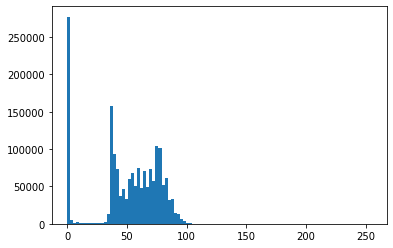

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread(img_path, cv2.COLOR_BGR2YUV)
eq_img = cv2.equalizeHist(img)
plt.hist(img.flat, bins = 100, range = (0, 255))

In [14]:
cv2.imshow("Image histo equalize", cl_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Normalization Using Imagenet 

In [ ]:
#imagenet stats
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
data_transforms = transforms.Compose(
                       [transforms.ToTensor(),
                       normalize])
img = cv2.imread(img_path)
img = data_transforms(img)
norm_img = torchvision.transforms.ToPILImage()(img)
sv_norm_img = norm_img.save("norm_img.jpg") 
norm_img

In [29]:
from PIL import Image

In [30]:
img  = Image.open(img_path)

In [21]:
import cv2

In [1]:
import pandas as pd
prediction_on_Test_DL = pd.read_pickle("prediction_on_Test_DL.pkl")

In [2]:
import cv2
from tqdm import tqdm
import numpy as np

In [3]:
contrast = []
for i in tqdm(range(1900)):
    img_gray = cv2.imread(prediction_on_Test_DL.loc[i, 'Image Path'])
    img_gray = cv2.resize(img_gray, (512,512))
    img_gray_flatten = img_gray.flatten()
    if img_gray_flatten is None:
        continue
    contrast.append(np.max(img_gray_flatten) - np.min(img_gray_flatten))    

100%|██████████| 1900/1900 [02:16<00:00, 13.96it/s]


In [21]:
img_gray = cv2.imread(prediction_on_Test_DL.loc[953, 'Image Path'], cv2.COLOR_BGR2GRAY)
img_gray = cv2.resize(img_gray, (512,512))
img_gray_flatten = img_gray.flatten()


In [24]:
prediction_on_Test_DL.loc[953, 'Image Path'], cv2.COLOR_BGR2GRAY

('/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R KRISHNAN_M_01-01-1943_0266_(0005).jpg',
 6)

In [20]:
for i in range(1900):
    if contrast[i] < 150:
        print(i)

953
957
958
972
979
981
986
988
991
997
998
1000
1002
1003
1005
1007
1012
1014
1017
1018
1026
1041
1044
1046
1047
1048
1052
1053
1058
1064
1067
1069
1071
1073
1077
1083
1084
1085
1086
1088
1089
1090
1092
1095
1103
1108
1112
1119
1121
1122
1125
1129
1130
1138
1140
1141
1146
1149
1152
1154
1155
1156
1157
1159
1160
1161
1163
1164
1166
1167
1168
1176
1177
1180
1181
1185
1193
1210
1217
1219
1223
1224
1225
1229
1233
1235
1237
1239
1242
1248
1249
1251
1253
1255
1256
1266
1267
1268
1270
1272
1278
1281
1282
1283
1287
1289
1291
1292
1294
1295
1298
1300
1301
1304
1308
1311
1314
1321
1322
1324
1326
1330
1331
1332
1341
1342
1343
1344
1347
1348
1353
1354
1355
1356
1357
1368
1371
1375
1376
1378
1379
1383
1387
1389
1390
1394
1396
1399
1400
1401
1402
1404
1407
1409
1413
1424
1437
1441
1445
1449
1451
1458
1459
1460
1468
1472
1476
1477
1479
1480
1482
1484
1485
1486
1489
1490
1491
1494
1498
1503
1505
1506
1508
1512
1516
1517
1524
1529
1531
1533
1534
1537
1540
1543
1546
1547
1555
1559
1562
1563
1565
1566
1

In [22]:
unique_element = set(img_gray_flatten)

In [23]:
unique_element

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 108}

In [4]:
good_contrast = contrast[:950]
bad_contrast = contrast[950: 1900]

In [5]:
gc = good_contrast
bc = bad_contrast

In [6]:
gc.sort()
bc.sort()

In [22]:
diff_gc_and_bc = []
for i in range(950):
    diff_gc_and_bc.append(gc[i]-bc[i])

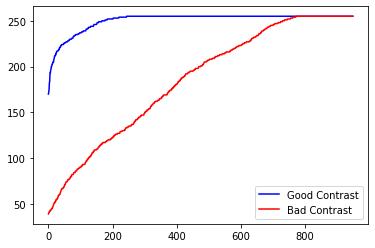

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(950),gc, '-b',  label='Good Contrast')
plt.plot(range(950),bc, '-r', label='Bad Contrast')
plt.legend()
plt.show()

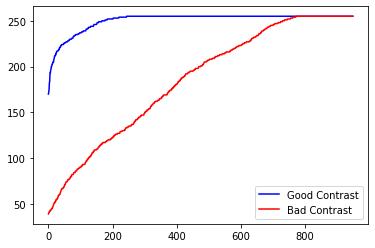

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(950),gc, '-b',  label='Good Contrast')
plt.plot(range(950),bc, '-r', label='Bad Contrast')
plt.legend()
plt.show()

In [13]:
contrast[1000]

130

In [12]:
prediction_on_Test_DL.loc[1000, 'Image Path']

'/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R GANESAN_B_01-01-1948_0655_(0015).jpg'

In [14]:
from PIL import Image
from PIL import ImageEnhance
import numpy as np
import cv2

image = Image.open('/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/ARMD R DHANACHELIAN_R_01-01-1948_0538_(0014).jpg')
image = image.resize((512, 512)) 
#image.show()
#img_arr = np.array(image)
#cv2.imshow("Original Image",img_arr)

'''
enh_bri = ImageEnhance.Brightness(image)
brightness = 2.0
image_brightened = enh_bri.enhance(brightness)


enh_con = ImageEnhance.Contrast(image)
contrast = 2.5
image_contrasted = enh_con.enhance(contrast)

'''
enh_sha = ImageEnhance.Sharpness(image)
sharpness = 2.0
image_sharped = enh_sha.enhance(sharpness)

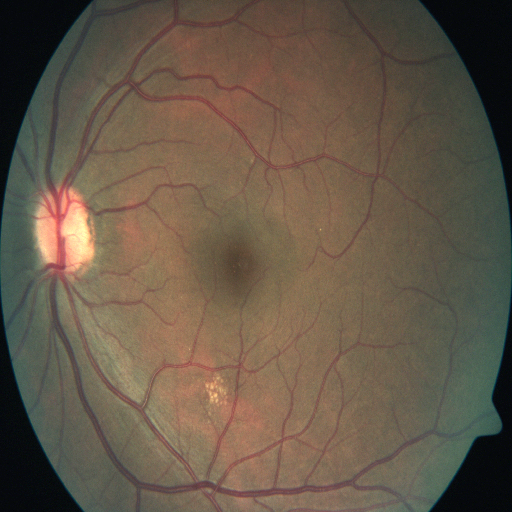

In [10]:
image_brightened

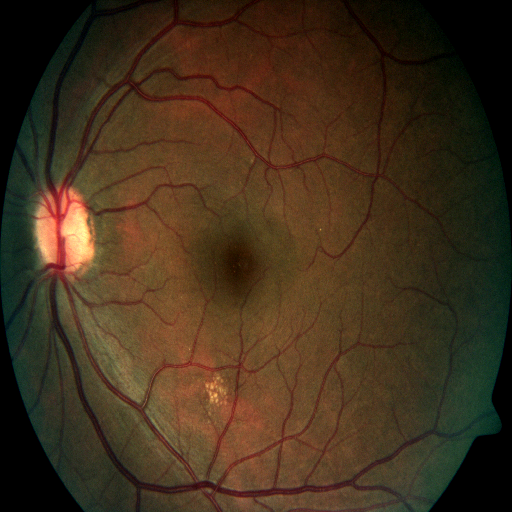

In [12]:
image_contrasted

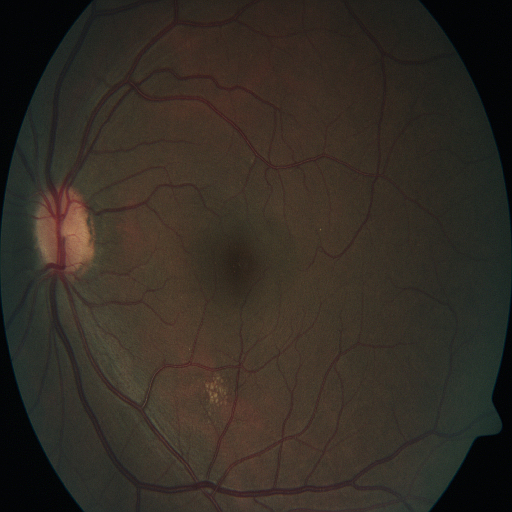

In [15]:
image_sharped

In [ ]:
img_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E JAGADEESAN_D_04071966_0104_68849.jpg'

In [ ]:
org_img = cv2.imread(img_path)
org_img = image.resize((512, 512))

In [16]:
image_brightened.show()
image_contrasted.show()
image_sharped.show()

In [7]:
import cv2
import numpy as np

## Read
img = cv2.imread("/home/harsh/amk/r-d/src/image_brightened.jpg")

## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## mask of green (36,25,25) ~ (86, 255,255)
# mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))
mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))

## slice the green
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

## save 
cv2.imwrite("green.png", green)
cv2.imshow("grrn", green)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))

In [4]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
image_brightened.save("image_brightened.jpg")
image_contrasted.save("image_contrasted.jpg")
image_sharped.save("image_sharped.jpg")

In [26]:
image_brightened.save("image_brightened.jpg")
'''
learn.predict(img_path)
img_path = open_image("/home/harsh/amk/r-d/src/image_brightened.jpg")
prediction = learn.predict(img_path)
'''
#os.remove("/home/harsh/amk/r-d/src/prgb.jpg") 

'\nlearn.predict(img_path)\nimg_path = open_image("/home/harsh/amk/r-d/src/image_brightened.jpg")\nprediction = learn.predict(img_path)\n'

In [52]:
img_gray = cv2.imread(prediction_on_Test_DL.loc[1000, 'Image Path'])
img_gray = cv2.resize(img_gray, (512,512))
img_gray_flatten = img_gray.flatten()
#if img_gray_flatten is None:
#    continue
np.max(img_gray_flatten) - np.min(img_gray_flatten)

130

In [53]:
img_gray = cv2.imread("/home/harsh/amk/r-d/src/image_brightened.jpg")
img_gray = cv2.resize(img_gray, (512,512))
img_gray_flatten = img_gray.flatten()
#if img_gray_flatten is None:
#    continue
np.max(img_gray_flatten) - np.min(img_gray_flatten)

255

In [54]:
img_gray = cv2.imread("/home/harsh/amk/r-d/src/image_contrasted.jpg")
img_gray = cv2.resize(img_gray, (512,512))
img_gray_flatten = img_gray.flatten()
#if img_gray_flatten is None:
#    continue
np.max(img_gray_flatten) - np.min(img_gray_flatten)

255

In [55]:
img_gray = cv2.imread("/home/harsh/amk/r-d/src/image_sharped.jpg")
img_gray = cv2.resize(img_gray, (512,512))
img_gray_flatten = img_gray.flatten()
#if img_gray_flatten is None:
#    continue
np.max(img_gray_flatten) - np.min(img_gray_flatten)

255

In [24]:
prediction_on_Test_DL.loc[1000, 'Image Path']

'/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R GANESAN_B_01-01-1948_0655_(0015).jpg'

In [41]:
type(image_brightened)

PIL.Image.Image

In [44]:
pix = np.array(image_brightened)

In [45]:
pix

array([[[ 2,  5, 10],
        [10, 12, 17],
        [ 2, 12, 10],
        ...,
        [ 5, 15, 17],
        [ 5, 15, 12],
        [ 5, 15, 12]],

       [[10,  7, 20],
        [ 7, 10, 15],
        [ 7, 12, 10],
        ...,
        [ 5, 15, 12],
        [ 5, 15, 12],
        [ 5, 17,  7]],

       [[10,  7, 20],
        [10, 10, 15],
        [10, 15, 12],
        ...,
        [ 5,  7, 12],
        [ 7, 12, 10],
        [ 7, 12, 10]],

       ...,

       [[ 7, 10, 15],
        [ 7, 10, 15],
        [10, 12, 17],
        ...,
        [ 0, 10, 12],
        [ 5,  7, 12],
        [ 5,  7, 12]],

       [[ 7, 10, 15],
        [ 7, 10, 15],
        [ 7, 10, 15],
        ...,
        [ 2, 12, 15],
        [ 2, 12, 15],
        [ 2, 12, 10]],

       [[10, 12, 17],
        [10, 12, 17],
        [10, 15, 12],
        ...,
        [ 0, 15, 15],
        [ 0, 15, 15],
        [ 2, 12, 15]]], dtype=uint8)

In [48]:
flatten = pix.flatten()

In [51]:
len(flatten)

15201912

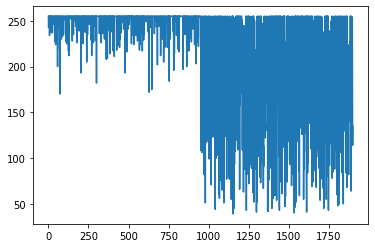

In [49]:
plt.plot(range(1900),contrast)

In [53]:
contrast = gc +bc

NameError: name 'bc' is not defined

In [7]:
need_enh = []
for i in range(0,950):
    if   (200 < contrast[i]) &  (240 > contrast[i]) :
        need_enh.append(i)

In [8]:
import fastai
from fastai.vision import *
from fastai.vision.models import *
import cv2
from PIL import Image as PImage

In [9]:
for i in need_enh[0:30]:
    img_path = prediction_on_Test_DL.loc[i, 'Image Path']
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512,512))
    learn = load_learner("/home/harsh/amk/Resized_imgs_of_good_bad/", 
                         'Image_Quality_Classifier_ImgSize_128_ResNet18_auroc_99.60_Recall_98_Precision_97_MathewsCoeff_94_with_ImagenetStatsNormalization.pkl')
    prediction = learn.predict(open_image(prediction_on_Test_DL.loc[i, 'Image Path']))
    pred1 = "Actual- " + str(prediction[0]) + ' ' + str(torch.max(prediction[2]).item())
    img1 = img
    

    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=7.0,tileGridSize=(8,8))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)
    
    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

    Prgb = PImage.fromarray(rgb, 'RGB')
    Prgb.save("prgb.jpg")
    img = open_image("/home/harsh/amk/r-d/src/prgb.jpg")
    
    prediction = learn.predict(img)
    
    
    img = cv2.imread("/home/harsh/amk/r-d/src/prgb.jpg")
    pred2 = " | Clahe - " + str(prediction[0]) + ' ' + str(torch.max(prediction[2]).item())
    numpy_horizontal_concat = np.concatenate((img1, img), axis=1)
    cv2.imshow(pred1 + pred2, numpy_horizontal_concat)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    os.remove("/home/harsh/amk/r-d/src/prgb.jpg")

In [1]:
import fastai
from fastai.vision import *
from fastai.vision.models import *
import cv2
from PIL import Image as PImage

img_path = '/home/harsh/amk/GOOD_BAD_ND_MausumiData/BAD/1600.png'
img = cv2.imread(img_path)
img = cv2.resize(img, (512,512))
learn = load_learner("/home/harsh/amk/128*128_Resized_imgs_of_good_bad/", 
                     'Image_Quality_Classifier_ImgSize_128_ResNet18_auroc_99.60_Recall_98_Precision_97_MathewsCoeff_94_with_ImagenetStatsNormalization.pkl')
prediction = learn.predict(open_image(img_path))
pred1 = "Actual- " + str(prediction[0]) + ' ' + str(torch.max(prediction[2]).item())
img1 = img


lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(5,5))

lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

Prgb = PImage.fromarray(rgb, 'RGB')
Prgb.save("prgb.jpg")
img = open_image("/home/harsh/amk/r-d/src/prgb.jpg")

prediction = learn.predict(img)


img = cv2.imread("/home/harsh/amk/r-d/src/prgb.jpg")
pred2 = " | Clahe - " + str(prediction[0]) + ' ' + str(torch.max(prediction[2]).item())
numpy_horizontal_concat = np.concatenate((img1, img), axis=1)
cv2.imshow(pred1 + pred2, numpy_horizontal_concat)
cv2.waitKey(0)
cv2.destroyAllWindows()
os.remove("/home/harsh/amk/r-d/src/prgb.jpg")

In [48]:
img_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/2180_left.jpg'

In [39]:
img_path = "/home/harsh/amk/r-d/src/image_brightened.jpg"

In [49]:
#img_path = prediction_on_Test_DL.loc[500, 'Image Path']
img = cv2.imread(img_path)
learn = load_learner("/home/harsh/amk/Resized_imgs_of_good_bad/", 
                         'Image_Quality_Classifier_ImgSize_128_ResNet18_auroc_99.60_Recall_98_Precision_97_MathewsCoeff_94_with_ImagenetStatsNormalization.pkl')

img = cv2.resize(img, (512,512))

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(5,5))

lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

Prgb = PImage.fromarray(rgb, 'RGB')
Prgb.save("prgb.jpg")
#learn.predict(img_path)
img_path = open_image("/home/harsh/amk/r-d/src/prgb.jpg")
prediction = learn.predict(img_path)
os.remove("/home/harsh/amk/r-d/src/prgb.jpg")    



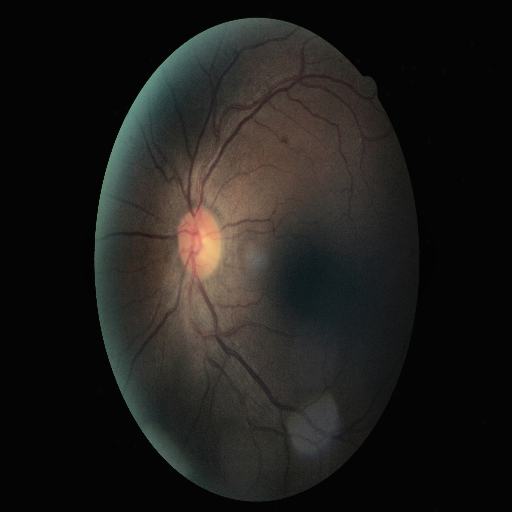

In [50]:
Prgb

In [ ]:
D R P E JAGADEESAN_D_04071966_0104_68849.jpg

In [47]:
prediction_on_Test_DL.loc[500, 'Image Path']

'/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E DURAIKANNU_S_27011959_0079_60792.jpg'

In [ ]:
'/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E JAGADEESAN_D_04071966_0104_68849.jpg'

In [43]:
np.exp(6.4057e-11)

1.000000000064057

In [10]:
prediction

(Category Good Quality, tensor(1), tensor([0.0014, 0.9986]))

In [58]:
img_path = open_image('/home/harsh/amk/r-d/src/image_brightened.jpg')
prediction = learn.predict(img_path)
prediction

(Category Good Quality, tensor(1), tensor([1.9615e-06, 1.0000e+00]))

In [61]:
prediction[2].to_numpy()[1]

AttributeError: 'Tensor' object has no attribute 'to_numpy'

In [ ]:
Prgb.save("prgb.jpg")
learn.predict(img_path)
img_path = open_image("/home/harsh/amk/r-d/src/prgb.jpg")
prediction = learn.predict(img_path)
os.remove("/home/harsh/amk/r-d/src/prgb.jpg") 

In [243]:
Prgb.save("prgb.jpg")

In [233]:
img = Image(pil2tensor(img,np.uint8))

In [245]:
img_path = open_image("/home/harsh/amk/r-d/src/prgb.jpg")

In [246]:
learn.predict(img_path)

(Category Bad Quality, tensor(0), tensor([0.9989, 0.0011]))

In [117]:
cv2.imshow("img",img)
cv2.imshow("clahe",bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [82]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [89]:
Pbgr = PImage.fromarray(bgr, 'RGB')
Pimg = PImage.fromarray(rgb_img, 'RGB')

In [33]:
from PIL import Image as PImage
from fastai.vision import *
bgr = cv2.cvtColor(lab, cv2.COLOR_BGR2RGB)
img = PImage.fromarray(bgr, 'RGB')
x = pil2tensor(img ,np.float32)
learn.predict(Image(x))#[2].numpy()

(Category Good Quality, tensor(1), tensor([0., 1.]))

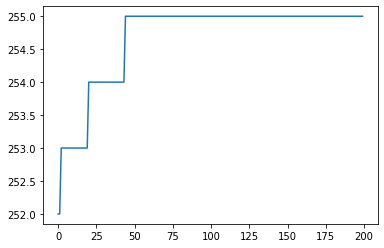

In [77]:

plt.plot(range(200),good_contrast[200:400])

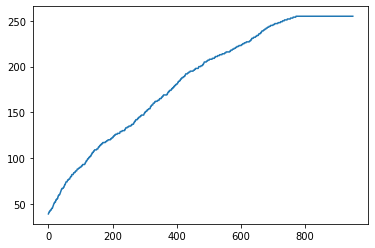

In [76]:
plt.plot(range(950),bad_contrast)

In [25]:
import pickle 
import pandas as pd
import fastai
from fastai.vision import *
from fastai.vision.models import *
from tqdm import tqdm
import glob
import cv2
learn = load_learner("/home/harsh/amk/Resized_imgs_of_good_bad/", 'Image_Quality_Classifier_ImgSize_128_ResNet18_auroc_99.60_Recall_98_Precision_97_MathewsCoeff_94_with_ImagenetStatsNormalization.pkl')

In [26]:
from tqdm import tqdm

In [79]:
inp_path = '/home/harsh/amk/mayank/bad/*'
for i, img_path in enumerate(tqdm(glob.glob(inp_path)[:])):
    img = open_image(img_path)
    prediction = learn.predict(img)
    if str(prediction[0]) == 'Bad Quality':
        shutil.copy(img_path, '/home/harsh/amk/mayank/Bad_pred_by_model/')
        source = '/home/harsh/amk/mayank/Bad_pred_by_model/' + img_path[27:]
        prob_pred = np.round(torch.max(prediction[2]).item()*100,2)
        dest = '/home/harsh/amk/mayank/Bad_pred_by_model/' + str(prob_pred) + img_path[27:]
        os.rename(source, dest) 
    else:
        shutil.copy(img_path, '/home/harsh/amk/mayank/Good_pred_by_model/')
        source = '/home/harsh/amk/mayank/Good_pred_by_model/' + img_path[27:]
        prob_pred = np.round(torch.max(prediction[2]).item()*100,2)
        dest = '/home/harsh/amk/mayank/Good_pred_by_model/' + str(prob_pred) + img_path[27:]
        os.rename(source, dest)

100%|██████████| 2612/2612 [00:37<00:00, 69.90it/s]


In [77]:
source = '/home/harsh/amk/mayank/Good_pred_by_model/' + img_path[27:]

In [78]:
source

'/home/harsh/amk/mayank/Good_pred_by_model/ShroffIshwar_41914.JPG_hsv_img.png'

In [68]:
h = '/home/harsh/amk/mayank/bad/'

In [74]:
img_path[27:]

'ShroffIshwar_41914.JPG_hsv_img.png'

In [34]:
str(prediction[0])


'Bad Quality'

In [62]:
np.round(torch.max(prediction[2]).item()*100,2)

85.16

In [36]:
prediction[2]

tensor([9.9999e-01, 6.2050e-06])

In [54]:
x = 9.9999e-01+6.2050e-06

In [56]:
x-6.2050e-06

0.99999

In [41]:
exp(6.2050e-06)

1.000006205019251

In [42]:
float("1.70000043572e-05")

1.70000043572e-05

In [48]:
x = float("9.9999e-01")
print("%.5f" % (x))

0.99999


In [50]:
6.2050e-06

6.205e-06

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 2199 (delta 0), reused 0 (delta 0), pack-reused 2194
Receiving objects: 100% (2199/2199), 8.02 MiB | 91.00 KiB/s, done.
Resolving deltas: 100% (1423/1423), done.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 48kB/s eta 0:00:01
     |████████████████████████████████| 204kB 30kB/s eta 0:00:01
  Created wheel for visdom: filename=visdom-0.1.8.9-cp37-none-any.whl size=655252 sha256=9ea950c329af3d5bee2ce7262e808550ab9bfc9ce9bd157b6c40a1d9332f8e61
  Stored in directory: /home/harsh/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp37-none-any.whl size=5712 sha256=baaf7088e145dd81b903ad61bfc938c1fec8f7faac39c142fdbbe614339c79f0
  Stored in directory: /home/harsh/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


In [4]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

Specified [horse2zebra]
for details.

--2020-02-19 11:36:11--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘./datasets/horse2zebra.zip’

./datasets/horse2ze 100%[===================>] 111.45M  20.8KB/s    in 86m 36s 

2020-02-19 13:02:50 (22.0 KB/s) - ‘./datasets/horse2zebra.zip’ saved [116867962/116867962]

Archive:  ./datasets/horse2zebra.zip
   creating: ./datasets/horse2zebra/trainA/
  inflating: ./datasets/horse2zebra/trainA/n02381460_6223.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1567.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3354.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_299.jpg  
  inflating: ./datasets/horse2zebra/tr

  inflating: ./datasets/horse2zebra/trainA/n02381460_591.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_6964.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_8769.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_2449.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4467.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1227.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3424.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_249.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_274.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1288.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1506.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_718.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_2649.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_5292.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4648.jpg  
  inflating: ./datasets/horse2zebra/trainA/n

  inflating: ./datasets/horse2zebra/trainA/n02381460_541.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_728.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4642.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4018.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_9063.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_2245.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_2563.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_7932.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_454.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4551.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_2643.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1084.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3911.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1596.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_396.jpg  
  inflating: ./datasets/horse2zebra/trainA/n

  inflating: ./datasets/horse2zebra/trainA/n02381460_1525.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_5045.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4608.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1703.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1266.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3746.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_971.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4125.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_7493.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4538.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_8088.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_6978.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_2217.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1736.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_394.jpg  
  inflating: ./datasets/horse2zebra/trainA

  inflating: ./datasets/horse2zebra/trainA/n02381460_8389.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1283.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_8575.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1348.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1106.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1645.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3566.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_7779.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1384.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_393.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1981.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_2269.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_879.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_6822.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1498.jpg  
  inflating: ./datasets/horse2zebra/trainA

  inflating: ./datasets/horse2zebra/trainA/n02381460_4743.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_5386.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4412.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4751.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_452.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_211.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3526.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_9184.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1182.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_128.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1674.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4572.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_2699.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3309.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4415.jpg  
  inflating: ./datasets/horse2zebra/trainA/

  inflating: ./datasets/horse2zebra/trainA/n02381460_1804.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1937.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_2951.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1761.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1212.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4977.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_2539.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_8958.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3605.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_629.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_765.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1263.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3226.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1194.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_91.jpg  
  inflating: ./datasets/horse2zebra/trainA/n

  inflating: ./datasets/horse2zebra/testB/n02391049_2890.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_2410.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_8080.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_5720.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_5320.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_9740.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_3010.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_560.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_9000.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_3200.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_2990.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_5810.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_2480.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_3270.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_2460.jpg  
  inflating: ./datasets/horse2zebra/testB/n02391049_5030

  inflating: ./datasets/horse2zebra/trainB/n02391049_225.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2821.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_7836.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2366.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_71.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_368.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2304.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_341.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_115.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_10701.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3778.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_444.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_7261.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_9136.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_46.jpg  
  inflating: ./datasets/horse2zebra/trainB/n0239

  inflating: ./datasets/horse2zebra/trainB/n02391049_9113.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_384.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_695.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_5209.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_5115.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_8859.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3115.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_1121.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_635.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3518.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2638.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2162.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_459.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2251.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_343.jpg  
  inflating: ./datasets/horse2zebra/trainB/n0

  inflating: ./datasets/horse2zebra/trainB/n02391049_2723.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_543.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_5501.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_7188.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2133.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2852.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_7911.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_10576.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2481.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_8028.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3153.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2946.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_608.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3938.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_1818.jpg  
  inflating: ./datasets/horse2zebra/train

  inflating: ./datasets/horse2zebra/trainB/n02391049_1908.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_721.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2486.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_638.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2967.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_1135.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_164.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3293.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_9487.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_9443.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_7563.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2214.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_234.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_4932.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_1436.jpg  
  inflating: ./datasets/horse2zebra/trainB/n

  inflating: ./datasets/horse2zebra/trainB/n02391049_3365.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_6564.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_9365.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_788.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_5208.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2637.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_5985.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2671.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_4.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2922.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_1992.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2714.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_36.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_9441.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3087.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02

  inflating: ./datasets/horse2zebra/trainB/n02391049_1314.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2281.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2183.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_6962.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2838.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_7566.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3253.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2633.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2973.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_5295.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_6227.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_8334.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_1174.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3266.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3868.jpg  
  inflating: ./datasets/horse2zebra/trai

  inflating: ./datasets/horse2zebra/trainB/n02391049_6775.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2405.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_1827.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_10123.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_7847.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2876.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3177.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_1195.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_10682.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_1129.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_675.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3162.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2469.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2631.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2609.jpg  
  inflating: ./datasets/horse2zebra/tra

  inflating: ./datasets/horse2zebra/trainB/n02391049_11153.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_7077.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_565.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_7.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_603.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_4729.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2951.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3682.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3018.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_10613.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_775.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_11063.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_671.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2729.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_9002.jpg  
  inflating: ./datasets/horse2zebra/trainB/n

In [5]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2020-02-19 13:02:51--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’

./checkpoints/horse 100%[===================>]  43.46M  41.4KB/s    in 27m 40s 

2020-02-19 13:30:34 (26.8 KB/s) - ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’ saved [45575747/45575747]



In [ ]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan

In [ ]:
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_fake.png')
plt.imshow(img)

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_real.png')
plt.imshow(img)

AttributeError: 'numpy.ndarray' object has no attribute 'set_xdata'

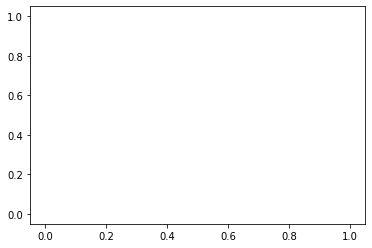

In [3]:
import matplotlib.pyplot as plt
import numpy

hl, = plt.plot([], [])

def update_line(hl, new_data):
    hl.set_xdata(numpy.append(hl.get_xdata(), new_data))
    hl.set_ydata(numpy.append(hl.get_ydata(), new_data))
    plt.draw()
update_line(numpy.arange(50), numpy.arange(50))    

# Auto Clahe

In [1]:
def pdf(sigma, intensity_mean, intensity):
    pdf_ = (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-1*(intensity- intensity_mean))/(2*np.square(sigma)))
    return pdf_       

def my_entropy(img_gray):
    flatten_img = img_gray.ravel()
    intensity_frequency_dict = {}
    unique_intensity = list(set(flatten_img))
    len_of_unique_intensity = len(unique_intensity)
    for i in range(len(flatten_img)):
        try: 
            intensity_frequency_dict[flatten_img[i]] += 1

        except:
            intensity_frequency_dict[flatten_img[i]] = 1

    intensity_sum =0
    for intensity in unique_intensity:
        intensity_sum += intensity
    intensity_mean = intensity_sum //len_of_unique_intensity 

    deviation = 0
    for intensity in unique_intensity:
        deviation += np.square(intensity- intensity_mean)
    sigma = np.sqrt(deviation/len_of_unique_intensity)    

    entropy = 0
    for intensity in unique_intensity:
        pdf_ = pdf(sigma,intensity_mean, intensity)
        entropy += (pdf_*np.log2(pdf_))
    entropy = -1*entropy  
    return entropy

In [1]:
import cv2
import pandas as pd
import numpy as np
from skimage.feature import greycomatrix # for entropy
from tqdm import tqdm
import glob 
from skimage.measure import compare_ssim

img_path = '/home/harsh/amk/quality_check_dataset/Test/Bad Quality/ARMD R ETTY_E_01-01-1944_2045_(0002).jpg'



def ssim(img1, img2):
    (score, diff) = compare_ssim(img1, img2, full=True)
    diff = (diff * 255).astype("uint8")
    return score

def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))


def entropy(img_gray):
    glcm = np.squeeze(greycomatrix(img_gray, distances=[1], 
                                   angles=[0], symmetric=True, 
                                   normed=True))
    entropy = -np.sum(glcm*np.log2(glcm + (glcm==0)))
    
    return entropy



def pdf(sigma, intensity_mean, intensity):
    pdf_ = (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-1*(intensity- intensity_mean))/(2*np.square(sigma)))
    return pdf_       

def global_contrast(img_gray):
    flatten_img = img_gray.ravel()
    intensity_frequency_dict = {}
    unique_intensity = list(set(flatten_img))
    len_of_unique_intensity = len(unique_intensity)
    for i in range(len(flatten_img)):
        try: 
            intensity_frequency_dict[flatten_img[i]] += 1

        except:
            intensity_frequency_dict[flatten_img[i]] = 1

    intensity_sum =0
    for intensity in unique_intensity:
        intensity_sum += intensity
    intensity_mean = intensity_sum //len_of_unique_intensity 

    second_central_moment = 0
    for intensity in unique_intensity:
        second_central_moment += (np.square(intensity-intensity_mean)*intensity_frequency_dict[intensity])
    gc = second_central_moment//len(flatten_img)    
    
    return gc
    
    
def spatial_frequency(img_gray):    
    r_val = 0
    c_val = 0
    rows = img_gray.shape[0]
    columns = img_gray.shape[1]

    for j in range(rows):
        for k in range(1, columns):
            r_val += np.square(img_gray[j][k] - img_gray[j][k-1])

    r = r_val/(rows*columns)


    for k in range(columns):
        for j in range(1, rows):
            c_val += np.square(img_gray[j][k] - img_gray[j-1][k])
    c = c_val/(rows)

    sf = np.sqrt(r+c)
    
    return sf

def absolute_mean_brightness_error(original_img_gray, processed_gray_img):
    org_unique_intensity = list(set(original_img_gray.ravel()))
    pro_unique_intensity = list(set(processed_gray_img.ravel()))
    sum_of_org_unique_intensity = 0
    sum_of_pro_unique_intensity = 0
    for i in org_unique_intensity:
        sum_of_org_unique_intensity += i
    for j in pro_unique_intensity:
        sum_of_pro_unique_intensity += j
    ambe = np.abs(sum_of_org_unique_intensity//len(org_unique_intensity) - sum_of_pro_unique_intensity// \
                  len(pro_unique_intensity))
    return ambe


columns = ["clip_limit","org_entropy", 'clahe_entropy', 'org_sf', 'clahe_sf', 'org_gc', 'clahe_gc', 'ambe' , 'ssim', 'psnr', "image_path"]
quality_check_df = pd.DataFrame(columns = columns)

img_path = '/home/harsh/amk/quality_check_dataset/Test/Good Quality/20051020_62802_0100_PP.tif'
# for i, img_path in enumerate(tqdm(glob.glob('/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/*'))):
#     order_breaking = []
#     breaking_loop = False
#     optim_clip = None
#     clahe_gc = None
clip_limit = [np.round(i/100, 1) for i in range(10,3000,100)]
for j, cl in enumerate(tqdm(clip_limit)):
    org_img = cv2.imread(img_path)

    img_bgr = cv2.resize(org_img, (512,512))
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)
    #img_gray = lab_planes[0]
    clahe = cv2.createCLAHE(clipLimit=cl,tileGridSize=(8,8))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)

    clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    clahe_img_gray = cv2.cvtColor(clahe_img, cv2.COLOR_BGR2GRAY)
    #clahe_img_gray = cv2.cvtColor(clahe_img, cv2.COLOR_BGR2GRAY)
    #clahe_img_gray = lab_planes[0]
    
    if j == 0:
        org_entropy = entropy(img_gray)
        org_sf = spatial_frequency(img_gray)
        org_gc = global_contrast(img_gray)
    quality_check_df.loc[j, 'clip_limit'] = cl   
    quality_check_df.loc[j, 'org_entropy'] = org_entropy
    quality_check_df.loc[j, 'clahe_entropy'] = entropy(clahe_img_gray)
    quality_check_df.loc[j, 'org_sf'] = org_sf
    quality_check_df.loc[j, 'clahe_sf'] = spatial_frequency(clahe_img_gray)
    quality_check_df.loc[j, 'org_gc'] = org_gc
    quality_check_df.loc[j, 'clahe_gc'] = global_contrast(clahe_img_gray)
    quality_check_df.loc[j, 'ambe'] = absolute_mean_brightness_error(img_gray, clahe_img_gray)
    quality_check_df.loc[j, "image_path"] =   img_path 
    quality_check_df.loc[j, "ssim"] = ssim(img_gray, clahe_img_gray)
    quality_check_df.loc[j, "psnr"] = psnr(img_gray, clahe_img_gray)
        
        
'''
        if j ==0:
            clahe_gc = global_contrast(clahe_img_gray)
            pass
        else:
            gc = global_contrast(clahe_img_gray)
            if clahe_gc < gc:
                clahe_gc = gc
            else:
                order_breaking.append(cl)
                
        if len(order_breaking) >1:
            optim_cl = order_breaking[1]
            breaking_loop = True
        else:
            optim_cl = cl
            
        if breaking_loop == True:
            break    

    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=optim_cl,tileGridSize=(8,8))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)     
    
    clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    concat_img = np.concatenate((img_bgr, clahe_img), axis=1)
    cv2.imwrite("/home/harsh/amk/Auto Enhance Image using Clahe/[ img_no " + str(i) + " optim clip " +str(optim_cl)+ ', grid_size(8,8)]' + img_path.split("/")[-1], concat_img)
            
'''    
'''    
    cv2.imshow("original image", org_img)
    cv2.imshow("Clahe image applied", clahe_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
'''    

  0%|          | 0/30 [00:00<?, ?it/s]/home/harsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in ubyte_scalars
/home/harsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in ubyte_scalars
100%|██████████| 30/30 [00:39<00:00,  1.31s/it]


'    \n    cv2.imshow("original image", org_img)\n    cv2.imshow("Clahe image applied", clahe_img)\n    cv2.waitKey(0)\n    cv2.destroyAllWindows()\n'

In [2]:
quality_check_df

clip_limit org_entropy clahe_entropy   org_sf clahe_sf org_gc clahe_gc  \
0         0.1      7.1064       6.75145  70.2336  73.4185   4545     4562   
1         1.1      7.1064       7.84544  70.2336  109.449   4545     5141   
2         2.1      7.1064       8.35621  70.2336   133.03   4545     5457   
3         3.1      7.1064       8.17531  70.2336  147.622   4545     5549   
4         4.1      7.1064       9.18733  70.2336  156.686   4545     5749   
5         5.1      7.1064       8.65533  70.2336  160.126   4545     5884   
6         6.1      7.1064       9.50123  70.2336   169.57   4545     6124   
7         7.1      7.1064       9.34127  70.2336  173.164   4545     6423   
8         8.1      7.1064       8.86612  70.2336  171.065   4545     6567   
9         9.1      7.1064       9.73875  70.2336  173.258   4545     6694   
10       10.1      7.1064       9.00603  70.2336  180.843   4545     6798   
11       11.1      7.1064       9.72279  70.2336  179.429   4545     6821   
12       12.1      7.1064       9.83277  70.2336  184.039   4545     6855   
13       13.1      7.1064       9.97372  70.2336  189.389   4545     6777   
14       14.1      7.1064       9.90719  70.2336  191.288   4545     6825   
15       15.1      7.1064       9.26763  70.2336  199.385   4545     6778   
16       16.1      7.1064       9.50346  70.2336  201.801   4545     6705   
17       17.1      7.1064       9.43557  70.2336  203.544   4545     6626   
18       18.1      7.1064       9.50524  70.2336  210.099   4545     6529   
19       19.1      7.1064       9.95685  70.2336  194.946   4545     6472   
20       20.1      7.1064        9.4965  70.2336  167.873   4545     6416   
21       21.1      7.1064       9.57716  70.2336  173.194   4545     6317   
22       22.1      7.1064       10.0359  70.2336   176.46   4545     6351   
23       23.1      7.1064       9.56204  70.2336  188.438   4545     6285   
24       24.1      7.1064       9.68682  70.2336   196.54   4545     6181   
25       25.1      7.1064       9.71916  70.2336  198.638   4545     6083   
26       26.1      7.1064       9.75666  70.2336  203.703   4545     5881   
27       27.1      7.1064       10.1139  70.2336  191.324   4545     5891   
28       28.1      7.1064       9.77688  70.2336  170.796   4545     5826   
29       29.1      7.1064       9.63835  70.2336  175.186   4545     5727   

   ambe      ssim     psnr                                         image_path  
0     2  0.864938  40.4013  /home/harsh/amk/quality_check_dataset/Test/Goo...  
1     9  0.676885  31.9101  /home/harsh/amk/quality_check_dataset/Test/Goo...  
2    13  0.538572  30.4739  /home/harsh/amk/quality_check_dataset/Test/Goo...  
3    15  0.435846  29.4912  /home/harsh/amk/quality_check_dataset/Test/Goo...  
4    18  0.359183  28.4677  /home/harsh/amk/quality_check_dataset/Test/Goo...  
5    20  0.311021  27.7601  /home/harsh/amk/quality_check_dataset/Test/Goo...  
6    23  0.273488  28.3361  /home/harsh/amk/quality_check_dataset/Test/Goo...  
7    26  0.247848  27.6896  /home/harsh/amk/quality_check_dataset/Test/Goo...  
8    28  0.226529  26.8685  /home/harsh/amk/quality_check_dataset/Test/Goo...  
9    30  0.209892  26.0779  /home/harsh/amk/quality_check_dataset/Test/Goo...  
10   31  0.197852  26.4983  /home/harsh/amk/quality_check_dataset/Test/Goo...  
11   32  0.188256  29.3149  /home/harsh/amk/quality_check_dataset/Test/Goo...  
12   33  0.178905  28.5181  /home/harsh/amk/quality_check_dataset/Test/Goo...  
13   33  0.171487   28.654  /home/harsh/amk/quality_check_dataset/Test/Goo...  
14   34  0.165471  27.8803  /home/harsh/amk/quality_check_dataset/Test/Goo...  
15   34   0.15968  27.4888  /home/harsh/amk/quality_check_dataset/Test/Goo...  
16   34   0.15503  27.2409  /home/harsh/amk/quality_check_dataset/Test/Goo...  
17   34  0.151386  26.4026  /home/harsh/amk/quality_check_dataset/Test/Goo...  
18   34  0.147801  28.4843  /home/harsh/amk/quality_check_dataset/Test/Goo...  
19   34  0.1451

# Auto Clahe Implementation

In [23]:
import os
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import glob 

your_path = "/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality"
saved_path = your_path + " after clahe"
made_folder = saved_path[-len(saved_path.split("/")[-1]):]

if made_folder in os.listdir(saved_path[:-len(saved_path.split("/")[-1])]):
    deleting_folder_path = saved_path[:-len(saved_path.split("/")[-1])]+made_folder+"/"
    for del_img_path in glob.glob(deleting_folder_path+'*'):
        os.remove(del_img_path)
    saved_path = saved_path+'/'    
else:
    os.mkdir(saved_path)
    saved_path = saved_path+'/'

In [24]:
kernel_size_list = [26, 29]
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

inp = input("Do you want to get original and enhanced image together press Y/y for yes and N/n for No ")

ori_and_clahe = False

if inp =="Y" or inp == "y":
    ori_and_clahe = True
else:
    ori_and_clahe = False

inp = input("Do you want to get kerenl and clip limt press Y/y for yes and N/n for No ")

kernel_and_optim_cl = False

if inp =="Y" or inp == "y":
    kernel_and_optim_cl = True
else:
    kernel_and_optim_cl = False
    

for i, img_path in enumerate(tqdm(glob.glob(your_path+"/*")[50:110])):
    optim_cl_wrt_kernel = []
    for kernel_size in kernel_size_list:

        clip_limit = [np.round(i/100, 1) for i in range(10,310,10)]
        psnr_value_wrt_cl = []

        org_img = cv2.imread(img_path)

        if org_img.any() == None:
            continue

        for j, cl in enumerate((clip_limit)):

            #Resize image
            org_img = cv2.resize(org_img, (512,512))

            lab = cv2.cvtColor(org_img, cv2.COLOR_BGR2LAB)

            lab_planes = cv2.split(lab)

            img_before_clahe = lab_planes[0]

            clahe = cv2.createCLAHE(clipLimit=cl,tileGridSize=(kernel_size, kernel_size))

            img_after_clahe = clahe.apply(lab_planes[0])

            psnr_value_wrt_cl.append(psnr(img_before_clahe, img_after_clahe))
        
        optim_cl = clip_limit[::-1][psnr_value_wrt_cl[::-1].index(max(psnr_value_wrt_cl[::-1]))]
        optim_cl_wrt_kernel.append(optim_cl)
        
        if kernel_size == kernel_size_list[-1]:
            
            optim_cl = max(optim_cl_wrt_kernel[::-1])
            kernel_size = kernel_size_list[optim_cl_wrt_kernel.index(optim_cl)]
            

            clahe = cv2.createCLAHE(clipLimit=optim_cl,tileGridSize=(kernel_size,kernel_size))

            lab_planes[0] = clahe.apply(lab_planes[0])

            lab = cv2.merge(lab_planes)

            enhance_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

            img_name = img_path.split("/")[-1]
            len_of_img_format = len(img_name.split('.')[-1])+1
            len_of_img_format
            
            if kernel_and_optim_cl == True:
                kernel_cl = "[" + str(kernel_size)+ ','+ str(optim_cl)+ "]"
            else:
                kernel_cl = ''

            if  ori_and_clahe == True:

                concat_img = np.concatenate((org_img, enhance_img), axis=1)
                cv2.imwrite(saved_path+img_name[:-len_of_img_format]+kernel_cl+img_name[-len_of_img_format:], concat_img)
            else:
                cv2.imwrite(saved_path+img_name[:-len_of_img_format]+kernel_cl+img_name[-len_of_img_format:], enhance_img)

print("Your enhanced path location is ", saved_path)

Do you want to get original and enhanced image together press Y/y for yes and N/n for No y
Do you want to get kerenl and clip limt press Y/y for yes and N/n for No y


100%|██████████| 60/60 [00:14<00:00,  4.28it/s]

Your enhanced path location is  /home/harsh/amk/Image_Quality_Dataset/Test/Good Quality after clahe/


In [12]:
x= [5,6,7]
y = [9,5,10]
x[y.index(max(y))]

7

In [ ]:
optim_cl = max(optim_cl_wrt_kernel[::-1])
kernel_size = kernel_size_list[optim_cl_wrt_kernel.index(optim_cl)]

In [109]:
os.listdir(saved_path[:-len(saved_path.split("/")[-1])])

['Good Quality', 'Bad Quality', 'Bad Quality after clahe']

In [ ]:
your_path+"/*")[50:60])):

In [ ]:
[50:150]))):

In [108]:
saved_path = your_path + " after clahe"
made_folder = saved_path[-len(saved_path.split("/")[-1]):]
if made_folder in os.listdir(saved_path[:-len(saved_path.split("/")[-1])]):
    deleting_folder_path = saved_path[-len(saved_path.split("/")[-1]):]+made_folder+"/"
    for del_img_path in os.listdir(deleting_folder_path):
        os.remove(del_img_path)
else:
    os.mkdir(saved_path)
    saved_path = saved_path+'/'

'Bad Quality after clahe'

In [112]:
together

'/home/harsh/amk/Image_Quality_Dataset/Test/'

In [113]:
made_folder

NameError: name 'made_folder' is not defined

In [1]:
import cv2
import pandas as pd
import numpy as np
from skimage.feature import greycomatrix # for entropy
from tqdm import tqdm
import glob 
from skimage.measure import compare_ssim

img_path = '/home/harsh/amk/quality_check_dataset/Test/Bad Quality/ARMD R ETTY_E_01-01-1944_2045_(0002).jpg'


def ssim(img1, img2):
    (score, diff) = compare_ssim(img, img2, full=True)
    diff = (diff * 255).astype("uint8")
    return score

def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))


def entropy(img_gray):
    glcm = np.squeeze(greycomatrix(img_gray, distances=[1], 
                                   angles=[0], symmetric=True, 
                                   normed=True))
    entropy = -np.sum(glcm*np.log2(glcm + (glcm==0)))
    
    return entropy

def pdf(sigma, intensity_mean, intensity):
    pdf_ = (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-1*(intensity- intensity_mean))/(2*np.square(sigma)))
    return pdf_       

def global_contrast(img_gray):
    flatten_img = img_gray.ravel()
    intensity_frequency_dict = {}
    unique_intensity = list(set(flatten_img))
    len_of_unique_intensity = len(unique_intensity)
    for i in range(len(flatten_img)):
        try: 
            intensity_frequency_dict[flatten_img[i]] += 1

        except:
            intensity_frequency_dict[flatten_img[i]] = 1

    intensity_sum =0
    for intensity in unique_intensity:
        intensity_sum += intensity
    intensity_mean = intensity_sum //len_of_unique_intensity 

    second_central_moment = 0
    for intensity in unique_intensity:
        second_central_moment += (np.square(intensity-intensity_mean)*intensity_frequency_dict[intensity])
    gc = second_central_moment//len(flatten_img)    
    
    return gc
    
    
def spatial_frequency(img_gray):    
    r_val = 0
    c_val = 0
    rows = img_gray.shape[0]
    columns = img_gray.shape[1]

    for j in range(rows):
        for k in range(1, columns):
            r_val += np.square(img_gray[j][k] - img_gray[j][k-1])

    r = r_val/(rows*columns)


    for k in range(columns):
        for j in range(1, rows):
            c_val += np.square(img_gray[j][k] - img_gray[j-1][k])
    c = c_val/(rows)

    sf = np.sqrt(r+c)
    
    return sf

def absolute_mean_brightness_error(original_img_gray, processed_gray_img):
    org_unique_intensity = list(set(original_img_gray.ravel()))
    pro_unique_intensity = list(set(processed_gray_img.ravel()))
    sum_of_org_unique_intensity = 0
    sum_of_pro_unique_intensity = 0
    for i in org_unique_intensity:
        sum_of_org_unique_intensity += i
    for j in pro_unique_intensity:
        sum_of_pro_unique_intensity += j
    ambe = np.abs(sum_of_org_unique_intensity//len(org_unique_intensity) - sum_of_pro_unique_intensity// \
                  len(pro_unique_intensity))
    return ambe


columns = ["clip_limit","org_entropy", 'clahe_entropy', 'org_sf', 'clahe_sf', 'org_gc', 'clahe_gc', 'ambe' , "image_path"]
quality_check_df = pd.DataFrame(columns = columns)

#img_path = '/home/harsh/amk/quality_check_dataset/Test/Good Quality/ARMD    CHANDIRAN_C_01-01-1945_0200_(0009).jpg'
for i, img_path in enumerate(tqdm(glob.glob('/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/*'))):
    increasing = 0
    decreasing = 0
    optim_cl = None
    clip_limit = [np.round(i/100, 1) for i in range(40,520,20)]
    for j, cl in enumerate((clip_limit)):
        org_img = cv2.imread(img_path)
        img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

        img_bgr = cv2.resize(org_img, (512,512))

        lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

        lab_planes = cv2.split(lab)
        img_gray = lab_planes[0]
        clahe = cv2.createCLAHE(clipLimit=cl,tileGridSize=(8,8))

        lab_planes[0] = clahe.apply(lab_planes[0])
        

        #lab = cv2.merge(lab_planes)

        #clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
        #clahe_img_gray = cv2.cvtColor(clahe_img, cv2.COLOR_BGR2GRAY)
        clahe_img_gray = lab_planes[0]

        #if i == 0:
        #    org_entropy = entropy(img_gray)
        #   org_sf = spatial_frequency(img_gray)
        #    org_gc = global_contrast(img_gray)
        #quality_check_df.loc[i, 'clip_limit'] = cl   
        #quality_check_df.loc[i, 'org_entropy'] = org_entropy
        #quality_check_df.loc[i, 'clahe_entropy'] = entropy(clahe_img_gray)
        #quality_check_df.loc[i, 'org_sf'] = org_sf
        #quality_check_df.loc[i, 'clahe_sf'] = spatial_frequency(clahe_img_gray)
        #quality_check_df.loc[i, 'org_gc'] = org_gc
        #quality_check_df.loc[i, 'clahe_gc'] = global_contrast(clahe_img_gray)
        #quality_check_df.loc[i, 'ambe'] = absolute_mean_brightness_error(img_gray, clahe_img_gray)
        #quality_check_df.loc[i, "image_path"] =   img_path  

        if j== 0:
            prev_gc = global_contrast(clahe_img_gray)
        else:
            curr_gc = global_contrast(clahe_img_gray)
            if curr_gc > prev_gc:
                increasing +=1
                prev_gc = curr_gc
            else:
                decreasing +=1
                prev_gc = curr_gc
            if (decreasing == 1 and increasing ==1): #or (increasing == 1 and decreasing == 2):
                optim_cl = cl
            else:
                optim_cl = cl


    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=optim_cl,tileGridSize=(8,8))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)     
    
    clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    concat_img = np.concatenate((img_bgr, clahe_img), axis=1)
    cv2.imwrite("/home/harsh/amk/Auto Enhance Image using Clahe/[ " + str(i) + " optim clip " +str(optim_cl)+ ', grid_size(8,8)]' + img_path.split("/")[-1], concat_img)
            
    
'''    
    cv2.imshow("original image", org_img)
    cv2.imshow("Clahe image applied", clahe_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
'''    

 34%|███▍      | 325/950 [18:00<32:36,  3.13s/it]

KeyboardInterrupt: 

In [129]:
import os
pt = '/home/harsh/amk/Image_Quality_Dataset/ok'
os.mkdir(pt) 


In [104]:
import cv2
import pandas as pd
import numpy as np
from skimage.feature import greycomatrix # for entropy
from tqdm import tqdm
import glob 

def global_contrast(img_gray):
    flatten_img = img_gray.ravel()
    intensity_frequency_dict = {}
    unique_intensity = list(set(flatten_img))
    len_of_unique_intensity = len(unique_intensity)
    for i in range(len(flatten_img)):
        try: 
            intensity_frequency_dict[flatten_img[i]] += 1

        except:
            intensity_frequency_dict[flatten_img[i]] = 1

    intensity_sum =0
    for intensity in unique_intensity:
        intensity_sum += intensity
    intensity_mean = intensity_sum //len_of_unique_intensity 

    second_central_moment = 0
    for intensity in unique_intensity:
        second_central_moment += (np.square(intensity-intensity_mean)*intensity_frequency_dict[intensity])
    gc = second_central_moment//len(flatten_img)    
    
    return gc

columns = ["clip_limit","org_entropy", 'clahe_entropy', 'org_sf', 'clahe_sf', 'org_gc', 'clahe_gc', 'ambe' , "image_path"]
quality_check_df = pd.DataFrame(columns = columns)
img_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/ARMDR ANUSUYA_M_01-01-1935_2387_(0008).jpg'
clip_limit = [np.round(i/100, 1) for i in range(10,810,10)]
for j, cl in enumerate(tqdm(clip_limit)):
    org_img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

    img_bgr = cv2.resize(org_img, (512,512))

    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)
    img_gray = lab_planes[0]
    clahe = cv2.createCLAHE(clipLimit=cl,tileGridSize=(8,8))

    lab_planes[0] = clahe.apply(lab_planes[0])

    #lab = cv2.merge(lab_planes)

    #clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    #clahe_img_gray = cv2.cvtColor(clahe_img, cv2.COLOR_BGR2GRAY)
    clahe_img_gray = lab_planes[0]

    if j == 0:
    #    org_entropy = entropy(img_gray)
    #    org_sf = spatial_frequency(img_gray)
        org_gc = global_contrast(img_gray)
    quality_check_df.loc[j, 'clip_limit'] = cl   
    #quality_check_df.loc[i, 'org_entropy'] = org_entropy
    #quality_check_df.loc[i, 'clahe_entropy'] = entropy(clahe_img_gray)
    #quality_check_df.loc[i, 'org_sf'] = org_sf
    #quality_check_df.loc[i, 'clahe_sf'] = spatial_frequency(clahe_img_gray)
    quality_check_df.loc[j, 'org_gc'] = org_gc
    quality_check_df.loc[j, 'clahe_gc'] = global_contrast(clahe_img_gray)
    #quality_check_df.loc[i, 'ambe'] = absolute_mean_brightness_error(img_gray, clahe_img_gray)
    #quality_check_df.loc[i, "image_path"] =   img_path  

100%|██████████| 80/80 [00:13<00:00,  6.06it/s]


In [105]:
quality_check_df.head(60)

clip_limit org_entropy clahe_entropy org_sf clahe_sf org_gc clahe_gc ambe  \
0         0.1         NaN           NaN    NaN      NaN   2948     2793  NaN   
1         0.2         NaN           NaN    NaN      NaN   2948     2714  NaN   
2         0.3         NaN           NaN    NaN      NaN   2948     2700  NaN   
3         0.4         NaN           NaN    NaN      NaN   2948     2668  NaN   
4         0.5         NaN           NaN    NaN      NaN   2948     2601  NaN   
5         0.6         NaN           NaN    NaN      NaN   2948     2586  NaN   
6         0.7         NaN           NaN    NaN      NaN   2948     2574  NaN   
7         0.8         NaN           NaN    NaN      NaN   2948     2566  NaN   
8         0.9         NaN           NaN    NaN      NaN   2948     2536  NaN   
9           1         NaN           NaN    NaN      NaN   2948     2501  NaN   
10        1.1         NaN           NaN    NaN      NaN   2948     2494  NaN   
11        1.2         NaN           NaN    NaN      NaN   2948     2485  NaN   
12        1.3         NaN           NaN    NaN      NaN   2948     2472  NaN   
13        1.4         NaN           NaN    NaN      NaN   2948     2453  NaN   
14        1.5         NaN           NaN    NaN      NaN   2948     2443  NaN   
15        1.6         NaN           NaN    NaN      NaN   2948     2436  NaN   
16        1.7         NaN           NaN    NaN      NaN   2948     2420  NaN   
17        1.8         NaN           NaN    NaN      NaN   2948     2412  NaN   
18        1.9         NaN           NaN    NaN      NaN   2948     2407  NaN   
19          2         NaN           NaN    NaN      NaN   2948     2392  NaN   
20        2.1         NaN           NaN    NaN      NaN   2948     2388  NaN   
21        2.2         NaN           NaN    NaN      NaN   2948     2383  NaN   
22        2.3         NaN           NaN    NaN      NaN   2948     2377  NaN   
23        2.4         NaN           NaN    NaN      NaN   2948     2371  NaN   
24        2.5         NaN           NaN    NaN      NaN   2948     2358  NaN   
25        2.6         NaN           NaN    NaN      NaN   2948     2360  NaN   
26        2.7         NaN           NaN    NaN      NaN   2948     2303  NaN   
27        2.8         NaN           NaN    NaN      NaN   2948     2301  NaN   
28        2.9         NaN           NaN    NaN      NaN   2948     2312  NaN   
29          3         NaN           NaN    NaN      NaN   2948     2303  NaN   
30        3.1         NaN           NaN    NaN      NaN   2948     2299  NaN   
31        3.2         NaN           NaN    NaN      NaN   2948     2298  NaN   
32        3.3         NaN           NaN    NaN      NaN   2948     2303  NaN   
33        3.4         NaN           NaN    NaN      NaN   2948     2305  NaN   
34        3.5         NaN           NaN    NaN      NaN   2948     2303  NaN   
35        3.6         NaN           NaN    NaN      NaN   2948     2299  NaN   
36        3.7         NaN           NaN    NaN      NaN   2948     2302  NaN   
37        3.8         NaN           NaN    NaN      NaN   2948     2299  NaN   
38        3.9         NaN           NaN    NaN      NaN   2948     2300  NaN   
39          4         NaN           NaN    NaN      NaN   2948     2313  NaN   
40        4.1         NaN           NaN    NaN      NaN   2948     2312  NaN   
41        4.2         NaN           NaN    NaN      NaN   2948     2315  NaN   
42        4.3         NaN           NaN    NaN      NaN   2948     2283  NaN   
43        4.4         NaN           NaN    NaN      NaN   2948     2285  NaN   
44        4.5         NaN           NaN    NaN      NaN   2948     2285  NaN   
45        4.6         NaN           NaN    NaN      NaN   2948     2289  NaN   
46        4.7         NaN           NaN    NaN      NaN   2948     2295  NaN   
47        4.8         NaN           NaN    NaN      NaN   2948     2300  NaN   
48        4.9         NaN           NaN    NaN      NaN   2948     2304  NaN   
49 

In [54]:
if i== 0:
    prev_gc = global_contrast
    pass
if curr_gc > prev_gc:
    increasing +=1
    prev_gc = curr_gc
else:
    decreasing +=1
    prev_gc = curr_gc
if (decreasing == 2 and increasing ==1) or (increasing == 1 and decreasing == 2):
    optim_cl = cl
else:
    optim_cl = cl
    

3

In [108]:
org_img = cv2.imread(img_path)
img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

img_bgr = cv2.resize(org_img, (512,512))

lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)
#img_gray = lab_planes[0]
clahe = cv2.createCLAHE(clipLimit=2.9,tileGridSize=(8,8))

lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
concat_img = np.concatenate((img_bgr, clahe_img), axis=1)
cv2.imshow("original image and clahe applied image", concat_img)
#cv2.imshow("Clahe image applied", clahe_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [147]:
quality_check_df

clip_limit org_entropy clahe_entropy   org_sf clahe_sf org_gc clahe_gc  \
0          10     6.89188       11.4757  32.5027  150.305   2006     2003   
1          20     6.89188       12.5274  32.5027  165.098   2006     2866   
2          30     6.89188       12.8823  32.5027  172.016   2006     3079   
3          40     6.89188       13.0268  32.5027  169.558   2006     3138   
4          50     6.89188       13.0706  32.5027  170.916   2006     3142   
5          60     6.89188       13.1062  32.5027  170.027   2006     3125   
6          70     6.89188       13.1195  32.5027  169.943   2006     3124   
7          80     6.89188       13.1266  32.5027  169.831   2006     3135   
8          90     6.89188       13.1276  32.5027   169.89   2006     3136   
9         100     6.89188       13.1276  32.5027   169.89   2006     3136   
10        110     6.89188       13.1276  32.5027   169.89   2006     3136   
11        120     6.89188       13.1276  32.5027   169.89   2006     3136   
12        130     6.89188       13.1276  32.5027   169.89   2006     3136   
13        140     6.89188       13.1276  32.5027   169.89   2006     3136   
14        150     6.89188       13.1276  32.5027   169.89   2006     3136   
15        160     6.89188       13.1276  32.5027   169.89   2006     3136   
16        170     6.89188       13.1276  32.5027   169.89   2006     3136   
17        180     6.89188       13.1276  32.5027   169.89   2006     3136   
18        190     6.89188       13.1276  32.5027   169.89   2006     3136   
19        200     6.89188       13.1276  32.5027   169.89   2006     3136   
20        210     6.89188       13.1276  32.5027   169.89   2006     3136   
21        220     6.89188       13.1276  32.5027   169.89   2006     3136   
22        230     6.89188       13.1276  32.5027   169.89   2006     3136   
23        240     6.89188       13.1276  32.5027   169.89   2006     3136   
24        250     6.89188       13.1276  32.5027   169.89   2006     3136   
25        260     6.89188       13.1276  32.5027   169.89   2006     3136   
26        270     6.89188       13.1276  32.5027   169.89   2006     3136   
27        280     6.89188       13.1276  32.5027   169.89   2006     3136   
28        290     6.89188       13.1276  32.5027   169.89   2006     3136   
29        300     6.89188       13.1276  32.5027   169.89   2006     3136   
30        310     6.89188       13.1276  32.5027   169.89   2006     3136   
31        320     6.89188       13.1276  32.5027   169.89   2006     3136   
32        330     6.89188       13.1276  32.5027   169.89   2006     3136   
33        340     6.89188       13.1276  32.5027   169.89   2006     3136   
34        350     6.89188       13.1276  32.5027   169.89   2006     3136   
35        360     6.89188       13.1276  32.5027   169.89   2006     3136   
36        370     6.89188       13.1276  32.5027   169.89   2006     3136   
37        380     6.89188       13.1276  32.5027   169.89   2006     3136   
38        390     6.89188       13.1276  32.5027   169.89   2006     3136   
39        400     6.89188       13.1276  32.5027   169.89   2006     3136   
40        410     6.89188       13.1276  32.5027   169.89   2006     3136   
41        420     6.89188       13.1276  32.5027   169.89   2006     3136   
42        430     6.89188       13.1276  32.5027   169.89   2006     3136   
43        440     6.89188       13.1276  32.5027   169.89   2006     3136   
44        450     6.89188       13.1276  32.5027   169.89   2006     3136   
45        460     6.89188       13.1276  32.5027   169.89   2006     3136   
46        470     6.89188       13.1276  32.5027   169.89   2006     3136   
47        480     6.89188       13.1276  32.5027   169.89   2006     3136   
48        490     6.89188       13.1276  32.5027   169.89   2006     3136   
49        500     6.89188       13.1276  32.5027   169.89   2006     3136   

   ambe                        image_path  
0    22  /home/harsh/amk/0df488

# Finding the larger entropy 

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 0
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/6.jpg


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


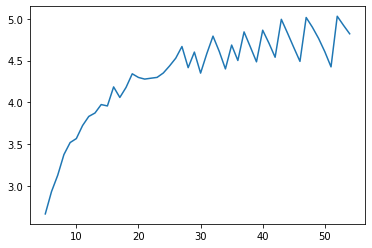

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 1
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/ARMD R NAGAMMAL_J_01-01-1948_0223_(0013).jpg


100%|██████████| 50/50 [00:36<00:00,  1.39it/s]


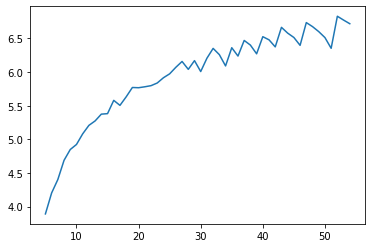

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 2
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/ACHARJEE_SOMNATH_01-01-1970_P0101408_(0001).jpg


100%|██████████| 50/50 [00:36<00:00,  1.39it/s]


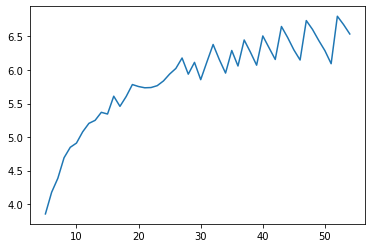

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 3
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/20060530_55304_0100_PP.tif


100%|██████████| 50/50 [00:36<00:00,  1.39it/s]


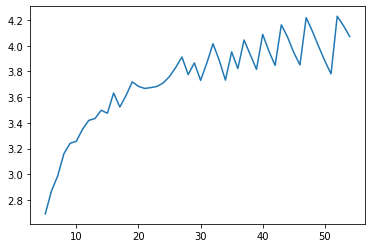

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 4
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/20060530_54718_0100_PP.tif


100%|██████████| 50/50 [00:36<00:00,  1.39it/s]


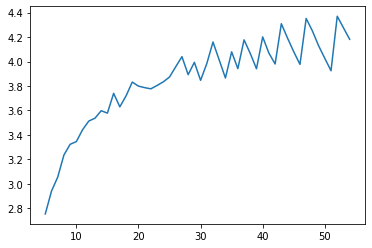

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 5
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E BANUMATI_S_20101959_0096_61328.jpg


100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


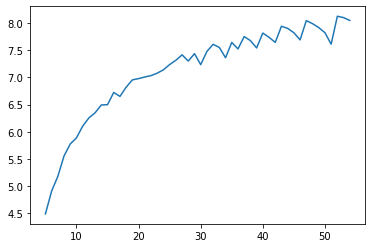

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 6
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/20051020_62709_0100_PP..jpg


100%|██████████| 50/50 [00:35<00:00,  1.43it/s]


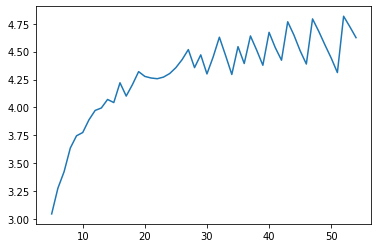

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 7
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/Datta ._Sonali ._24-09-1963_706591_(0005).jpg


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


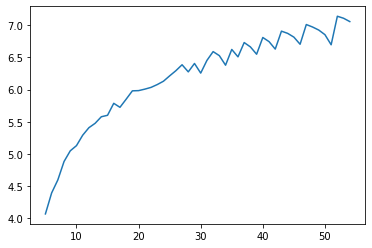

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 8
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/0002CR0D (66).jpg


100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


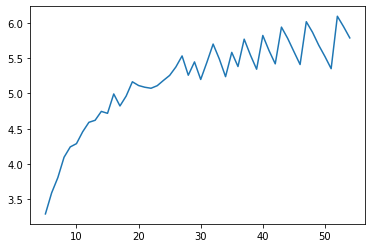

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 9
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/BEGAM^SMT^MAIMUL_20161110141310157701009001.png


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


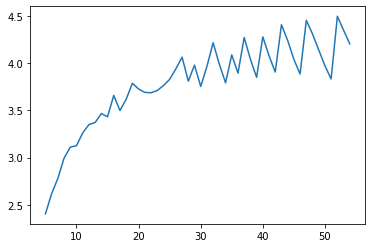

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 10
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E DURAIKANNU_S_27011959_0079_60786.jpg


100%|██████████| 50/50 [00:36<00:00,  1.39it/s]


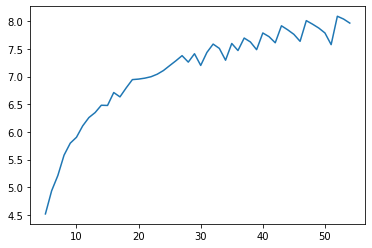

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 11
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/Maji_Mihir Kr_01-01-1967_P0000537_(0001).jpg


100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


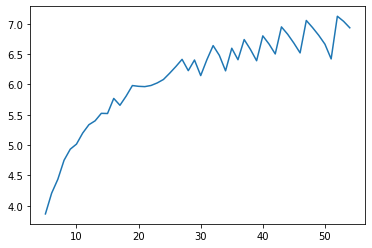

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 12
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E KANNIVEL_K_07091952_0059_60297.jpg


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


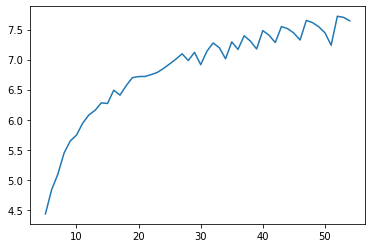

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 13
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/ARMDR     MEENACHI_R_01-01-1946_0134_(0004).jpg


100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


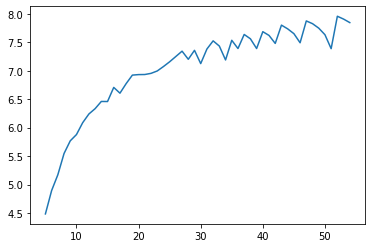

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 14
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E CHANDRA_P_05031955_0035_68857.jpg


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


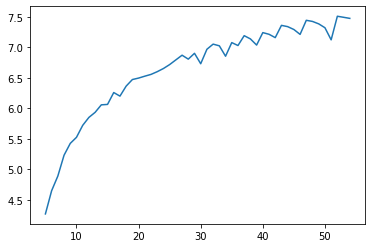

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 15
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P R BOMMIYAMMAL_B_01-01-1950_0640_(0005).jpg


100%|██████████| 50/50 [00:43<00:00,  1.16it/s]


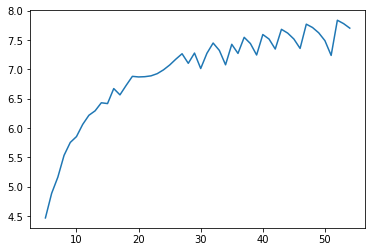

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 16
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/20051021_58802_0100_PP..jpg


100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


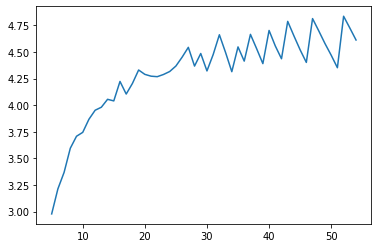

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 17
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/BURNWAL_BHIM_01-01-1954_P0093016_(0002).jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


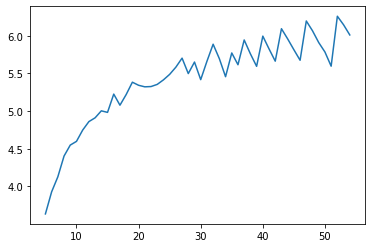

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 18
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/Bala_Hari Bar_27-04-1943_610815_(0001).jpg


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


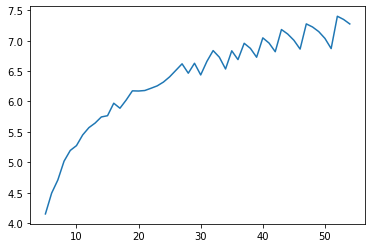

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 19
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E CHANDRA_P_05031955_0035_68855 - Copy.jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


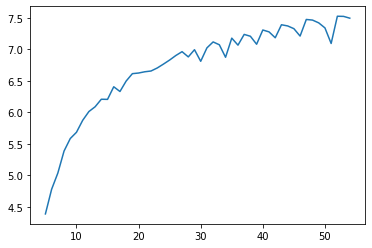

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 20
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E DHARA BAI_S_04021949_0068_62357.jpg


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


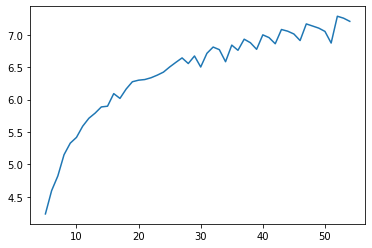

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 21
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E KANDASAMY_S_06081953_0106_62410.jpg


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


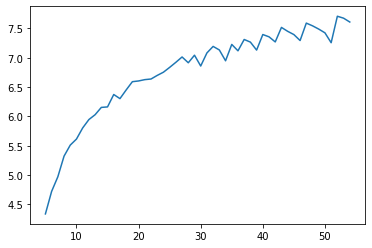

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 22
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/image058.png


100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


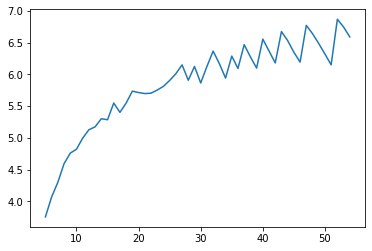

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 23
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/BHATTACHARYYA ._SHIVAJI_10-05-1953_614953_(0003).jpg


100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


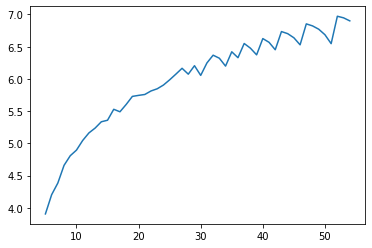

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 24
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/image015.png


100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


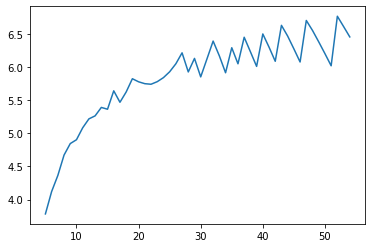

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 25
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E DURAIKANNU_S_27011959_0079_60792.jpg


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


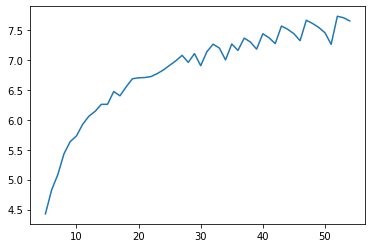

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 26
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E RAZACK_S S_26051946_0070_60844.jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


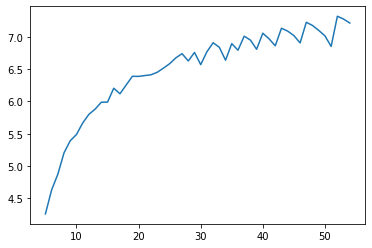

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 27
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/20060530_55628_0100_PP.tif


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


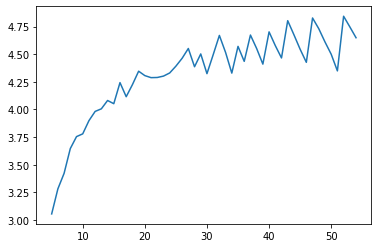

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 28
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/image112.png


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


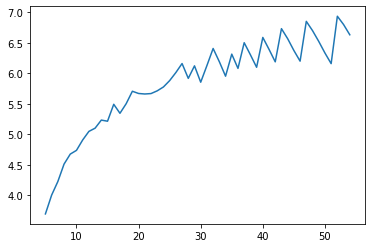

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 29
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/ARMD R ELUMALAI_M_01-01-1939_1972_(0011).jpg


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


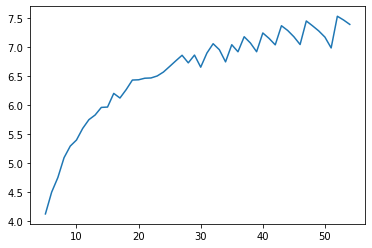

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 30
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/Basu_Rina_01-01-1952_628449_(0000).jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


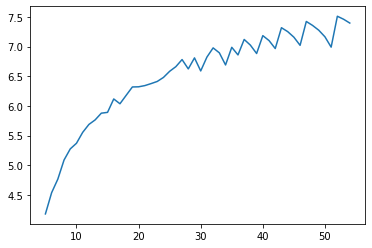

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 31
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E DHARA BAI_S_04021949_0068_62358.jpg


100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


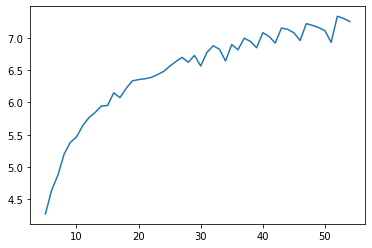

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 32
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/ARMD  R  ARULANANTHAM_K_01-01-1940_0471_(0015).jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


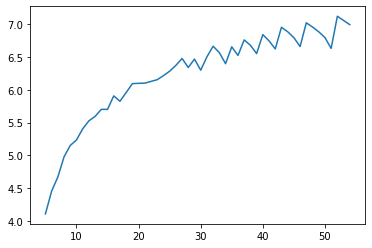

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 33
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E SUNDARAMURTHY_D_06041960_0169_64729.jpg


100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


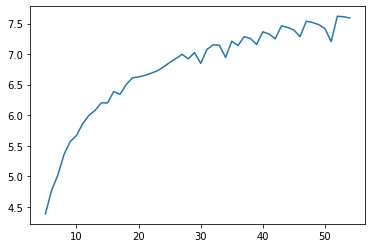

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 34
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/Baidya ._Debasish ._21-01-1984_610891_(0002).jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


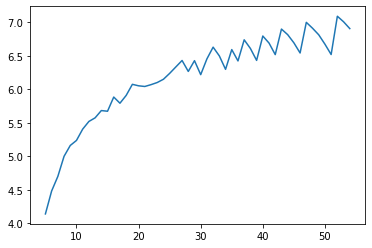

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 35
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/ARMD R SARADHA_S_01-01-1946_0187_(0008).jpg


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


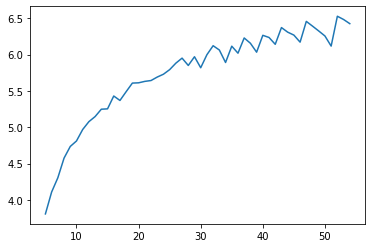

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 36
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E DHARA BAI_S_04021949_0068_62368 - Copy.jpg


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


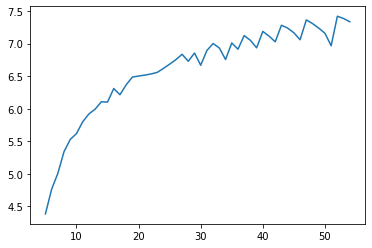

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 37
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E DURAIKANNU_S_27011959_0079_60775.jpg


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


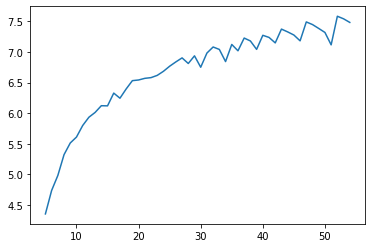

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 38
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E BAGYALAKSHMI_M_11111952_0087_61090.jpg


100%|██████████| 50/50 [00:39<00:00,  1.28it/s]


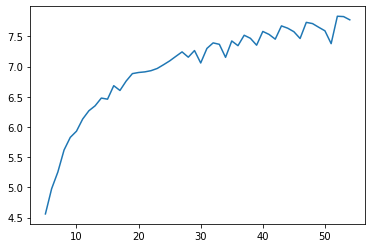

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 39
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E CYNTHIA MARY_S_03081958_0116_62431 - Copy.jpg


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


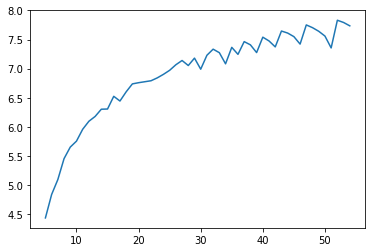

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 40
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R P E CHANDRA_P_05031955_0035_68880.jpg


100%|██████████| 50/50 [00:38<00:00,  1.28it/s]


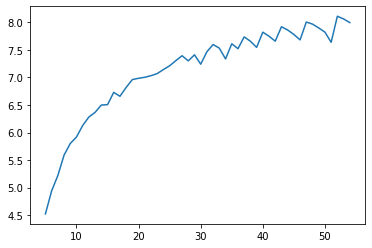

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 41
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/ARMDR  SOKKAMMAL_M_01-01-1944_0566_(0010).jpg


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


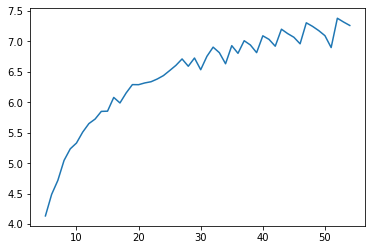

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 42
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/20051021_59243_0100_PP..jpg


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


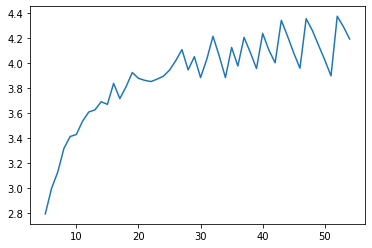

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 43
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/20060530_54653_0100_PP.tif


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


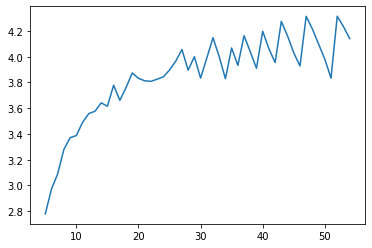

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 44
/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/ARMD R SELVAMANI_B_01-01-1948_0050_(0010).jpg


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


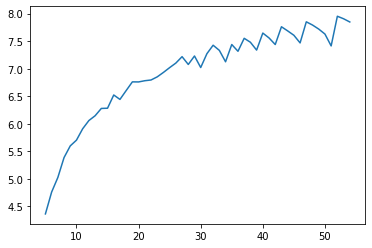

In [2]:
import cv2
import pandas as pd
import numpy as np
from skimage.feature import greycomatrix # for entropy
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt

def entropy(img_gray):
    glcm = np.squeeze(greycomatrix(img_gray, distances=[1], 
                                   angles=[0], symmetric=True, 
                                   normed=True))
    entropy = -np.sum(glcm*np.log2(glcm + (glcm==0)))
    
    return entropy

def avg_intensity_func(img):
    img_flatten = img.ravel()
    max_intensity = max(list(set(img_flatten)))
    #min_intensity = min(img_flatten)
    sum_intensity = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum_intensity += (img[i,j]/max_intensity)
    return sum_intensity/len(img_flatten)

def rms_contrast_func(img, avg_intensity):
    img_flatten = img.ravel()
    max_intensity = max(list(set(img_flatten)))
    sum_intensity = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum_intensity += np.square((img[i,j]/max_intensity) - avg_intensity)
    return np.sqrt(sum_intensity/(img.shape[0]*img.shape[1]))            


def global_contrast(img_gray):
    flatten_img = img_gray.ravel()
    intensity_frequency_dict = {}
    unique_intensity = list(set(flatten_img))
    len_of_unique_intensity = len(unique_intensity)
    for i in range(len(flatten_img)):
        try: 
            intensity_frequency_dict[flatten_img[i]] += 1

        except:
            intensity_frequency_dict[flatten_img[i]] = 1

    intensity_sum =0
    for intensity in unique_intensity:
        intensity_sum += intensity
    intensity_mean = intensity_sum //len_of_unique_intensity 

    second_central_moment = 0
    for intensity in unique_intensity:
        second_central_moment += (np.square(intensity-intensity_mean)*intensity_frequency_dict[intensity])
    gc = second_central_moment//len(flatten_img)    
    
    return gc
    
    
def spatial_frequency(img_gray):    
    r_val = 0
    c_val = 0
    rows = img_gray.shape[0]
    columns = img_gray.shape[1]

    for j in range(rows):
        for k in range(1, columns):
            r_val += np.square(img_gray[j][k] - img_gray[j][k-1])

    r = r_val/(rows*columns)


    for k in range(columns):
        for j in range(1, rows):
            c_val += np.square(img_gray[j][k] - img_gray[j-1][k])
    c = c_val/(rows)

    sf = np.sqrt(r+c)
    
    return sf


img_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/Thakur_Yogendra_24-07-1949_P0093269_(0001).jpg'
for i, img_path in enumerate(glob.glob('/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/*')[0:900:20]):
    print(f" epoch {i}")
    #img_path = "/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/20051020_62802_0100_PP.tif"
    print(img_path)
    org_img = cv2.imread(img_path)
    if org_img.any() == None:
        continue
    img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

    img_bgr = cv2.resize(org_img, (512,512))

    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)
    img_gray = lab_planes[0]
    #img_path = '/home/harsh/amk/0df488d86631.jpg'
    global_entropy = []
    rms = []
    avg_inten = []
    sf = []
    gc = []
    kernel_size_list = [i for i in range(5, 55, 1)]
    for kernel_size in tqdm(kernel_size_list):
        local_entropy = 0
        lc_rms = 0
        lc_avg_inten = 0
        lc_sf = 0
        iter_no = 0
        lc_gc = 0
        for j in range(0,img_gray.shape[0],kernel_size):
            for k in range(0, img_gray.shape[1], kernel_size):
                sub_img = img_gray[j:j+kernel_size,k:k+kernel_size]
                local_entropy += entropy(sub_img)
                iter_no += 1
                #ai = avg_intensity_func(sub_img)
                #lc_avg_inten += ai
                #lc_rms += rms_contrast_func(sub_img, ai)
                #lc_sf += spatial_frequency(sub_img)
                #lc_gc += global_contrast(sub_img)
        global_entropy.append(local_entropy/iter_no) 
        #rms.append(lc_rms/iter_no)
        #avg_inten.append(lc_avg_inten/iter_no)
        #sf.append(lc_sf/iter_no)
        #gc.append(lc_gc/iter_no)
        
    '''    #global_entropy.append(np.max(local_entropy))
    kernel_size_list[global_entropy.index(np.max(global_entropy))]
    kernel_entropy_list = {}
    for m, kernel_size in enumerate(kernel_size_list):
        key_name = 'kernel_size ' + str(kernel_size )
        kernel_entropy_list[key_name] = global_entropy[m]
    vars()[i] = global_entropy    
    '''
    
    plt.plot(kernel_size_list[:], global_entropy[:])
    plt.show()
    '''
    plt.plot(kernel_size_list[:], rms[:])
    plt.show()
    plt.plot(kernel_size_list[:], avg_inten[:])
    plt.show()
    plt.plot(kernel_size_list[:], sf[:])
    plt.show()
    plt.plot(kernel_size_list[:], gc[:])
    plt.show()    
    '''

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 0
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD  UDAYA_R_01011949_1219_108335.jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


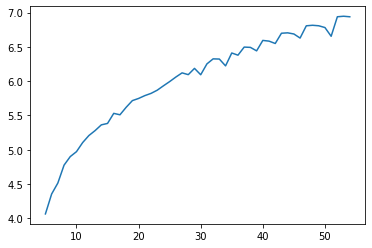

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 1
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/D R P R KATTON_C_01-01-1940_0518_(0004).jpg


100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


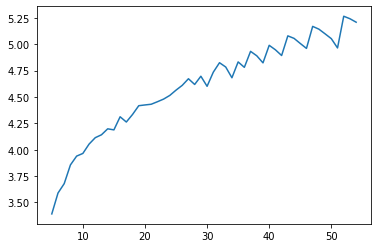

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 2
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD  SAROJINI_G_01011945_1562_125583.jpg


100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


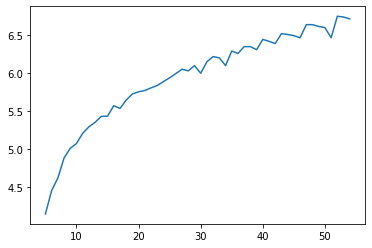

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 3
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD    KOTHANDA RAMAN_K_01011945_0884_95494.jpg


100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


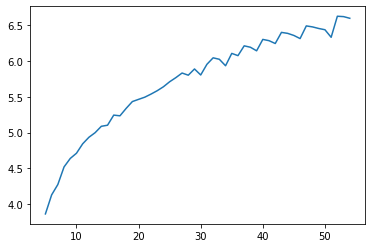

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 4
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/D R P R KANNIYAMMAL_M_01-01-1953_0546_(0008).jpg


100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


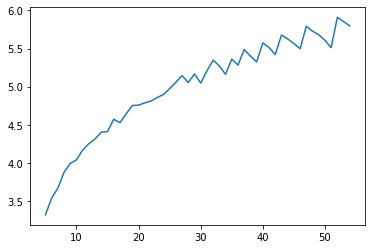

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 5
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD    SAKUNTALA_D_01011939_0727_90584.jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


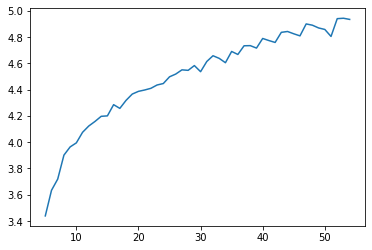

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 6
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD  SARASWATI_N_01011939_1466_119540.jpg


100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


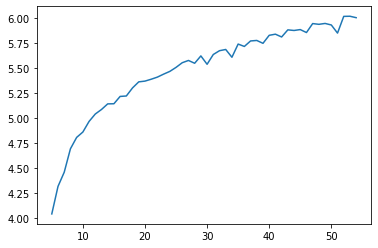

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 7
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R KRISHNAN_M_01-01-1943_0266_(0011).jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


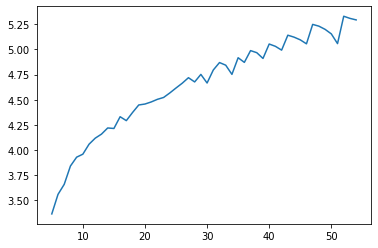

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 8
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD  SHANTHA_SR_01011945_1547_124830.jpg


100%|██████████| 50/50 [00:36<00:00,  1.39it/s]


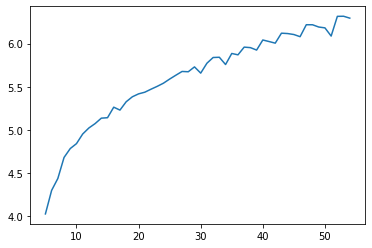

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 9
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/D R P R GOVINHAMMAL_M_01-01-1944_1026_(0009).jpg


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


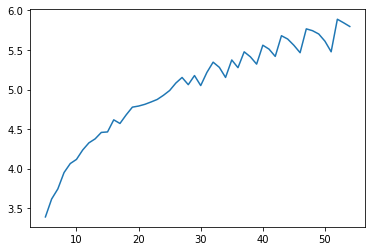

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 10
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD   KATHAVARAYAN_K_01011945_0623_86661.jpg


100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


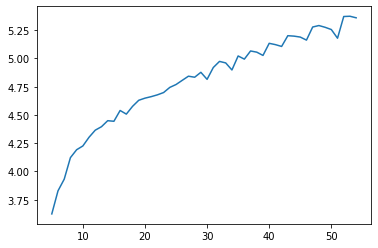

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 11
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/DRPR    PALAYAM_K_01-01-1945_0418_(0014).jpg


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


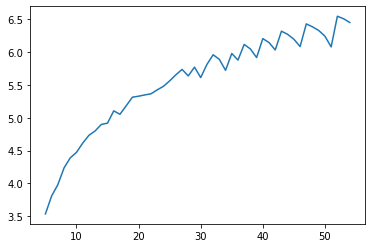

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 12
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD    MANIAMMAL_M_01011938_0650_86955.jpg


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


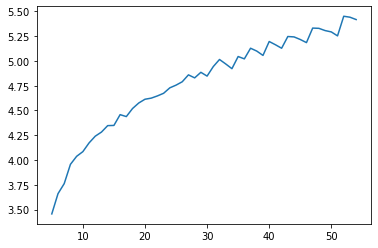

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 13
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R KANDHASAMY_P_01-01-1949_1858_(0002).jpg


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


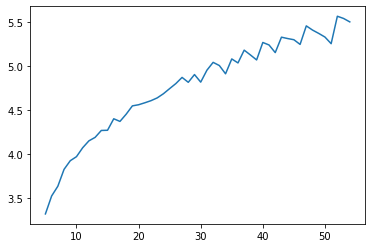

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 14
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD    PARATHASARATHY_KM_01011945_0733_90947.jpg


100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


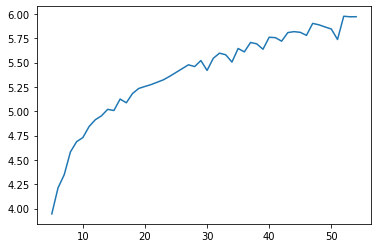

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 15
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD   SUNDARAMOORHY_S_01011945_0757_91927.jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


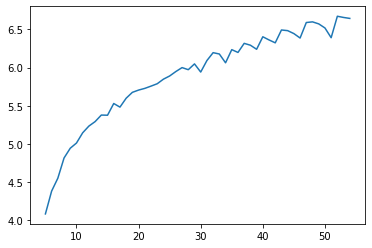

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 16
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/DRPR  PANDAMMAL_M_01-01-1945_0964_(0004).jpg


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


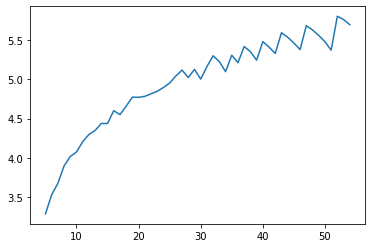

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 17
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD  NARAYANAN_N_01-01-1955_1547_(0011).jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


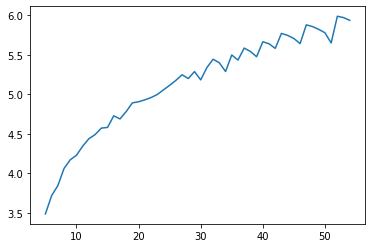

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 18
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R GANGAN_G_01-01-1943_0892_(0013).jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


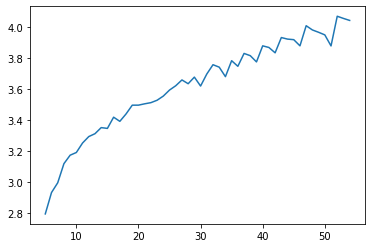

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 19
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R KANNAMMAL_C_01-01-1948_1110_(0002).jpg


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


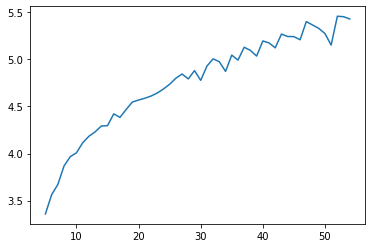

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 20
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD  DHANALAKSHMI_I_01011945_0954_98090.jpg


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


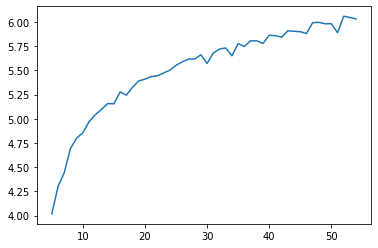

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 21
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD  SARASWATHY_G_01011955_1601_128182.jpg


100%|██████████| 50/50 [00:35<00:00,  1.43it/s]


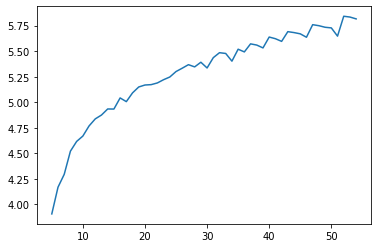

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 22
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R KUPPUSAMY_M_01-01-1944_1357_(0005).jpg


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


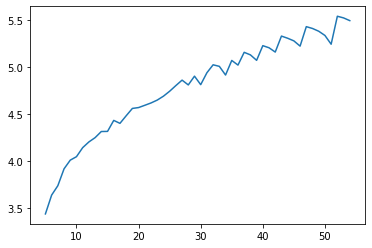

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 23
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD VEENAVATHI_M_01011933_1580_126489.jpg


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


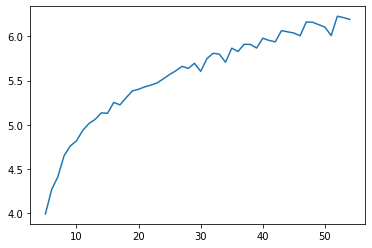

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 24
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD ALAGAMMAL_S_01011940_2228_182025.jpg


100%|██████████| 50/50 [00:35<00:00,  1.43it/s]


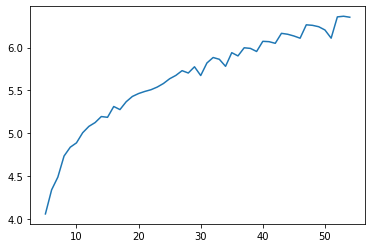

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 25
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD  VISALAKSHI_C_01011949_1575_125924.jpg


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


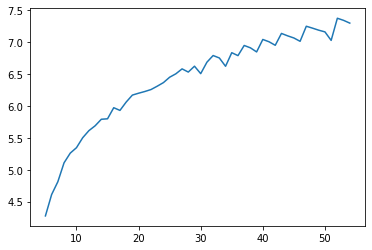

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 26
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R ETTIYAMMAL_E_01-01-1939_1833_(0004).jpg


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


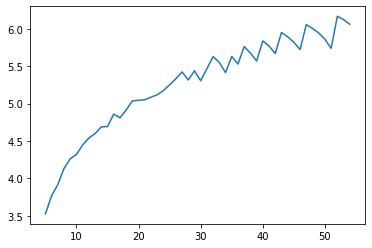

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 27
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/D R P R KRISHNAVENI_D_01-01-1948_0590_(0004).jpg


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


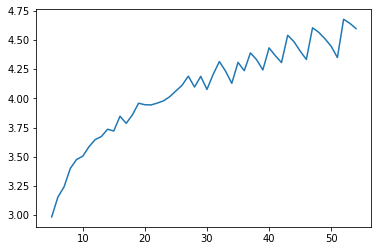

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 28
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/D R P R SOKKAMMAL_E_01-01-1946_0937_(0021).jpg


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


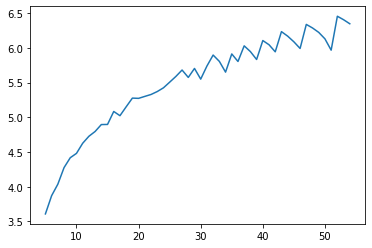

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 29
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD    JAYA MARY_S_01011946_1007_99423.jpg


100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


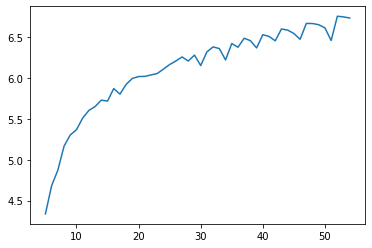

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 30
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/D R P R SARADHA_KESAVAN_01121942_110111041004_55276.jpg


100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


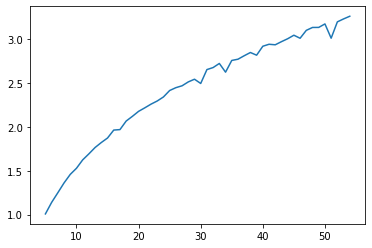

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 31
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R KOTTIYALAI_M_01-01-1946_0834_(0002).jpg


100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


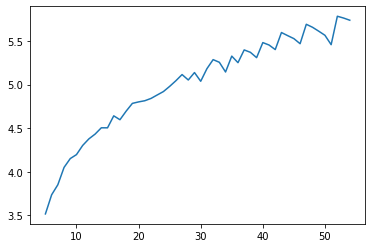

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 32
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD PADMANABAN_R_01011929_1513_120987.jpg


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


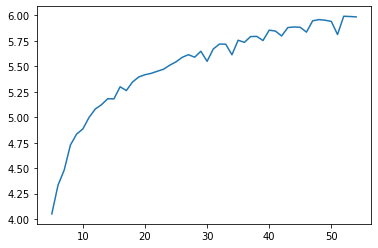

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 33
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R CHELLAMMAL_C_01-01-1946_1755_(0005).jpg


100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


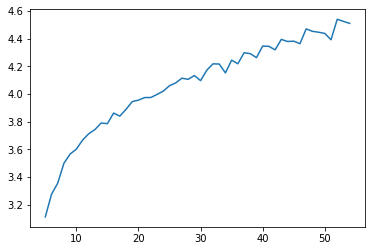

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 34
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD    SUNDARAMAN_J_01011949_0709_90177.jpg


100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


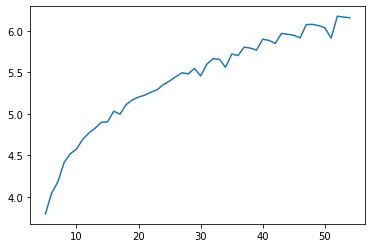

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 35
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R KAMATCHI_T_01-01-1949_1428_(0002).jpg


100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


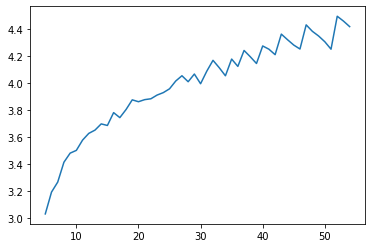

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 36
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R EGAMBARAM_M_01-01-1939_2120_(0004).jpg


100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


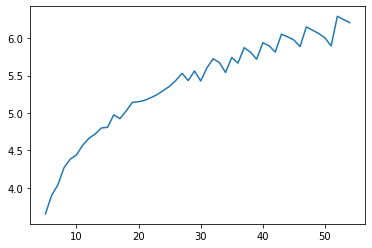

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 37
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD   KULASEKARAN_N_01011955_1046_100620.jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


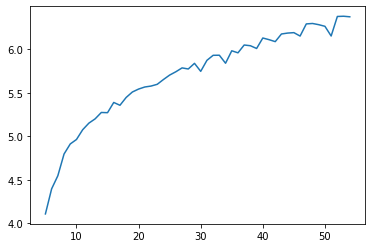

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 38
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD  DHANALAKSHMI_D_01011945_1556_124961.jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


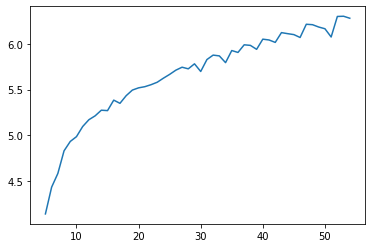

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 39
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R GANGAMMAL_G_01-01-1939_1742_(0008).jpg


100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


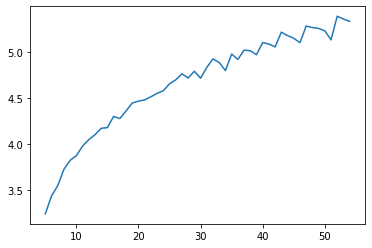

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 40
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R MARIYAMMAL_K_01-01-1948_0724_(0002).jpg


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


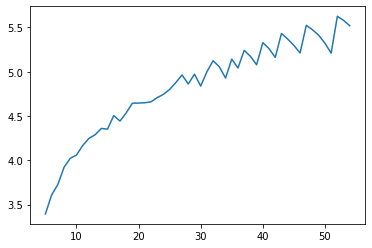

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 41
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD    SUSILA_K_01011939_1078_102312.jpg


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


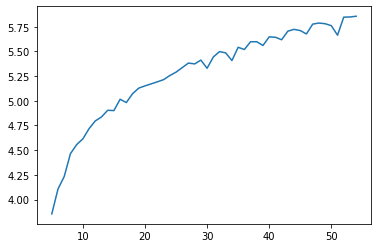

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 42
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD   DANAMMAL_R_01011936_1054_101149.jpg


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


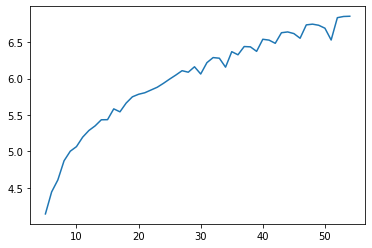

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 43
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/DRPE   DHANAPAKKAYAM_R_01-01-1945_0437_(0023).jpg


100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


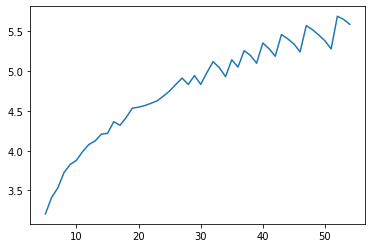

  0%|          | 0/50 [00:00<?, ?it/s]

 epoch 44
/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/D R P R NATARAJAN_D_01-01-1945_0651_(0004).jpg


100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


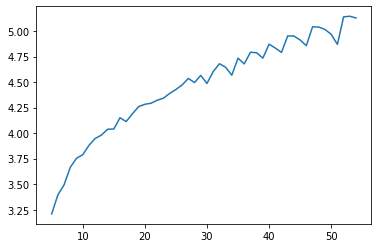

In [3]:
import cv2
import pandas as pd
import numpy as np
from skimage.feature import greycomatrix # for entropy
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt

def entropy(img_gray):
    glcm = np.squeeze(greycomatrix(img_gray, distances=[1], 
                                   angles=[0], symmetric=True, 
                                   normed=True))
    entropy = -np.sum(glcm*np.log2(glcm + (glcm==0)))
    
    return entropy

def avg_intensity_func(img):
    img_flatten = img.ravel()
    max_intensity = max(list(set(img_flatten)))
    #min_intensity = min(img_flatten)
    sum_intensity = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum_intensity += (img[i,j]/max_intensity)
    return sum_intensity/len(img_flatten)

def rms_contrast_func(img, avg_intensity):
    img_flatten = img.ravel()
    max_intensity = max(list(set(img_flatten)))
    sum_intensity = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum_intensity += np.square((img[i,j]/max_intensity) - avg_intensity)
    return np.sqrt(sum_intensity/(img.shape[0]*img.shape[1]))            


def global_contrast(img_gray):
    flatten_img = img_gray.ravel()
    intensity_frequency_dict = {}
    unique_intensity = list(set(flatten_img))
    len_of_unique_intensity = len(unique_intensity)
    for i in range(len(flatten_img)):
        try: 
            intensity_frequency_dict[flatten_img[i]] += 1

        except:
            intensity_frequency_dict[flatten_img[i]] = 1

    intensity_sum =0
    for intensity in unique_intensity:
        intensity_sum += intensity
    intensity_mean = intensity_sum //len_of_unique_intensity 

    second_central_moment = 0
    for intensity in unique_intensity:
        second_central_moment += (np.square(intensity-intensity_mean)*intensity_frequency_dict[intensity])
    gc = second_central_moment//len(flatten_img)    
    
    return gc
    
    
def spatial_frequency(img_gray):    
    r_val = 0
    c_val = 0
    rows = img_gray.shape[0]
    columns = img_gray.shape[1]

    for j in range(rows):
        for k in range(1, columns):
            r_val += np.square(img_gray[j][k] - img_gray[j][k-1])

    r = r_val/(rows*columns)


    for k in range(columns):
        for j in range(1, rows):
            c_val += np.square(img_gray[j][k] - img_gray[j-1][k])
    c = c_val/(rows)

    sf = np.sqrt(r+c)
    
    return sf


img_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/Thakur_Yogendra_24-07-1949_P0093269_(0001).jpg'
for i, img_path in enumerate(glob.glob('/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/*')[0:900:20]):
    print(f" epoch {i}")
    #img_path = "/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/20051020_62802_0100_PP.tif"
    print(img_path)
    org_img = cv2.imread(img_path)
    if org_img.any() == None:
        continue
    img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

    img_bgr = cv2.resize(org_img, (512,512))

    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)
    img_gray = lab_planes[0]
    #img_path = '/home/harsh/amk/0df488d86631.jpg'
    global_entropy = []
    rms = []
    avg_inten = []
    sf = []
    gc = []
    kernel_size_list = [i for i in range(5, 55, 1)]
    for kernel_size in tqdm(kernel_size_list):
        local_entropy = 0
        lc_rms = 0
        lc_avg_inten = 0
        lc_sf = 0
        iter_no = 0
        lc_gc = 0
        for j in range(0,img_gray.shape[0],kernel_size):
            for k in range(0, img_gray.shape[1], kernel_size):
                sub_img = img_gray[j:j+kernel_size,k:k+kernel_size]
                local_entropy += entropy(sub_img)
                iter_no += 1
                #ai = avg_intensity_func(sub_img)
                #lc_avg_inten += ai
                #lc_rms += rms_contrast_func(sub_img, ai)
                #lc_sf += spatial_frequency(sub_img)
                #lc_gc += global_contrast(sub_img)
        global_entropy.append(local_entropy/iter_no) 
        #rms.append(lc_rms/iter_no)
        #avg_inten.append(lc_avg_inten/iter_no)
        #sf.append(lc_sf/iter_no)
        #gc.append(lc_gc/iter_no)
        
    '''    #global_entropy.append(np.max(local_entropy))
    kernel_size_list[global_entropy.index(np.max(global_entropy))]
    kernel_entropy_list = {}
    for m, kernel_size in enumerate(kernel_size_list):
        key_name = 'kernel_size ' + str(kernel_size )
        kernel_entropy_list[key_name] = global_entropy[m]
    vars()[i] = global_entropy    
    '''
    
    plt.plot(kernel_size_list[:], global_entropy[:])
    plt.show()
    '''
    plt.plot(kernel_size_list[:], rms[:])
    plt.show()
    plt.plot(kernel_size_list[:], avg_inten[:])
    plt.show()
    plt.plot(kernel_size_list[:], sf[:])
    plt.show()
    plt.plot(kernel_size_list[:], gc[:])
    plt.show()    
    '''

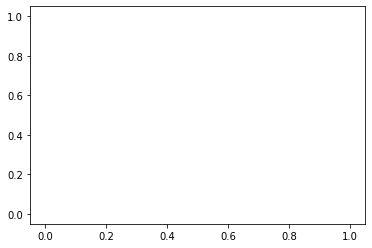

In [4]:
plt.plot(kernel_size_list[:], rms[:])
plt.show()

In [2]:
plt.plot(kernel_size_list[:25], vars()[i][:25])
plt.show() 

KeyError: 1

In [53]:
vars()[12][:25]

[5.3219280948873635,
 5.906890595608519,
 6.368507898969236,
 6.7359263506290326,
 7.003258334775645,
 7.24740865188523,
 7.563177895342841,
 7.669320066295372,
 7.918321048948848,
 8.139555354436862,
 8.280725993774183,
 8.394416768693139,
 8.596546205173203,
 8.659156960254869,
 8.636413627675745,
 8.77897057690722,
 8.99080181289202,
 8.972832687706775,
 8.93974455660762,
 9.027255882485981,
 9.244251675504707,
 9.374051020577099,
 9.12382246260498,
 9.500577841175222,
 9.3921505453006]

In [8]:
import cv2
import pandas as pd
import numpy as np
from skimage.feature import greycomatrix # for entropy
from tqdm import tqdm
import glob 
from skimage.measure import compare_ssim

img_path = '/home/harsh/amk/quality_check_dataset/Test/Bad Quality/ARMD R ETTY_E_01-01-1944_2045_(0002).jpg'


def ssim(img1, img2):
    (score, diff) = compare_ssim(img1, img2, full=True)
    diff = (diff * 255).astype("uint8")
    return score

def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))


def entropy(img_gray):
    glcm = np.squeeze(greycomatrix(img_gray, distances=[1], 
                                   angles=[0], symmetric=True, 
                                   normed=True))
    entropy = -np.sum(glcm*np.log2(glcm + (glcm==0)))
    
    return entropy

def avg_intensity_func(img):
    img_flatten = img.ravel()
    max_intensity = max(list(set(img_flatten)))
    #min_intensity = min(img_flatten)
    sum_intensity = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum_intensity += (img[i,j]/max_intensity)
    return sum_intensity/len(img_flatten)

def rms_contrast_func(img, avg_intensity):
    img_flatten = img.ravel()
    max_intensity = max(list(set(img_flatten)))
    sum_intensity = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum_intensity += np.square((img[i,j]/max_intensity) - avg_intensity)
    return np.sqrt(sum_intensity/(img.shape[0]*img.shape[1]))            


def pdf(sigma, intensity_mean, intensity):
    pdf_ = (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-1*(intensity- intensity_mean))/(2*np.square(sigma)))
    return pdf_       

def global_contrast(img_gray):
    flatten_img = img_gray.ravel()
    intensity_frequency_dict = {}
    unique_intensity = list(set(flatten_img))
    len_of_unique_intensity = len(unique_intensity)
    for i in range(len(flatten_img)):
        try: 
            intensity_frequency_dict[flatten_img[i]] += 1

        except:
            intensity_frequency_dict[flatten_img[i]] = 1

    intensity_sum =0
    for intensity in unique_intensity:
        intensity_sum += intensity
    intensity_mean = intensity_sum //len_of_unique_intensity 

    second_central_moment = 0
    for intensity in unique_intensity:
        second_central_moment += (np.square(intensity-intensity_mean)*intensity_frequency_dict[intensity])
    gc = second_central_moment//len(flatten_img)    
    
    return gc
    
    
def spatial_frequency(img_gray):    
    r_val = 0
    c_val = 0
    rows = img_gray.shape[0]
    columns = img_gray.shape[1]

    for j in range(rows):
        for k in range(1, columns):
            r_val += np.square(img_gray[j][k] - img_gray[j][k-1])

    r = r_val/(rows*columns)


    for k in range(columns):
        for j in range(1, rows):
            c_val += np.square(img_gray[j][k] - img_gray[j-1][k])
    c = c_val/(rows)

    sf = np.sqrt(r+c)
    
    return sf

def absolute_mean_brightness_error(original_img_gray, processed_gray_img):
    org_unique_intensity = list(set(original_img_gray.ravel()))
    pro_unique_intensity = list(set(processed_gray_img.ravel()))
    sum_of_org_unique_intensity = 0
    sum_of_pro_unique_intensity = 0
    for i in org_unique_intensity:
        sum_of_org_unique_intensity += i
    for j in pro_unique_intensity:
        sum_of_pro_unique_intensity += j
    ambe = np.abs(sum_of_org_unique_intensity//len(org_unique_intensity) - sum_of_pro_unique_intensity// \
                  len(pro_unique_intensity))
    return ambe


columns = ["clip_limit","org_entropy", 'clahe_entropy', 'org_sf', 'clahe_sf', 'org_gc', 'clahe_gc', 'ambe' , 'psnr', 'ssim', 'rms_contrast', 'avg_intensity', "image_path"]
quality_check_df = pd.DataFrame(columns = columns)

#img_path = '/home/harsh/amk/quality_check_dataset/Test/Good Quality/ARMD    CHANDIRAN_C_01-01-1945_0200_(0009).jpg'
for j, img_path in enumerate((glob.glob('/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/*')[28:29])):
    increasing = 0
    decreasing = 0
    optim_cl = None
    clip_limit = [np.round(i/100, 1) for i in range(10,310,10)]
    for i, cl in enumerate(tqdm(clip_limit)):
        #img_path = glob.glob('/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/*')[121]
        #img_path = "/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/ARMD R KOMALA_K_01-01-1948_00667_(0008).jpg"
        org_img = cv2.imread(img_path)
        #
        #img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)
        #print(org_img)
        img_bgr = cv2.resize(org_img, (512,512))

        lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

        lab_planes = cv2.split(lab)
        img_gray = lab_planes[0]
        clahe = cv2.createCLAHE(clipLimit=cl,tileGridSize=(20,20))

        lab_planes[0] = clahe.apply(lab_planes[0])
        

        #lab = cv2.merge(lab_planes)

        #clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
        #clahe_img_gray = cv2.cvtColor(clahe_img, cv2.COLOR_BGR2GRAY)
        clahe_img_gray = lab_planes[0]

        if i == 0:
            #org_entropy = entropy(img_gray)
            #org_sf = spatial_frequency(img_gray)
            org_gc = global_contrast(img_gray)
        quality_check_df.loc[i, 'clip_limit'] = cl   
        #quality_check_df.loc[i, 'org_entropy'] = org_entropy
        #quality_check_df.loc[i, 'clahe_entropy'] = entropy(clahe_img_gray)
        #quality_check_df.loc[i, 'org_sf'] = org_sf
        #quality_check_df.loc[i, 'clahe_sf'] = spatial_frequency(clahe_img_gray)
        quality_check_df.loc[i, 'org_gc'] = org_gc
        quality_check_df.loc[i, 'clahe_gc'] = global_contrast(clahe_img_gray)
        #quality_check_df.loc[i, 'ambe'] = absolute_mean_brightness_error(img_gray, clahe_img_gray)
        quality_check_df.loc[i, 'psnr'] = psnr(img_gray, clahe_img_gray)
        #quality_check_df.loc[i, 'ssim'] = ssim(img_gray, clahe_img_gray)
        #quality_check_df.loc[i, 'avg_intensity'] = avg_intensity_func(img_gray)
        #quality_check_df.loc[i, 'rms_contrast'] = rms_contrast_func(img_gray, quality_check_df.loc[i, 'avg_intensity'])
        #quality_check_df.loc[i, "image_path"] =   img_path  
'''
        if j== 0:
            prev_gc = global_contrast(clahe_img_gray)
        else:
            curr_gc = global_contrast(clahe_img_gray)
            if curr_gc > prev_gc:
                increasing +=1
                prev_gc = curr_gc
            else:
                decreasing +=1
                prev_gc = curr_gc
            if (decreasing == 1 and increasing ==1): #or (increasing == 1 and decreasing == 2):
                optim_cl = cl
            else:
                optim_cl = cl


    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=optim_cl,tileGridSize=(8,8))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)     
    
    clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    concat_img = np.concatenate((img_bgr, clahe_img), axis=1)
    cv2.imwrite("/home/harsh/amk/Auto Enhance Image using Clahe/[ " + str(i) + " optim clip " +str(optim_cl)+ ', grid_size(8,8)]' + img_path.split("/")[-1], concat_img)
'''            
    
'''    
    cv2.imshow("original image", org_img)
    cv2.imshow("Clahe image applied", clahe_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
'''    

100%|██████████| 30/30 [00:04<00:00,  6.90it/s]


'    \n    cv2.imshow("original image", org_img)\n    cv2.imshow("Clahe image applied", clahe_img)\n    cv2.waitKey(0)\n    cv2.destroyAllWindows()\n'

In [9]:
quality_check_df.head(30)

clip_limit org_entropy clahe_entropy org_sf clahe_sf org_gc clahe_gc ambe  \
0         0.1         NaN           NaN    NaN      NaN   1396     2158  NaN   
1         0.2         NaN           NaN    NaN      NaN   1396     2158  NaN   
2         0.3         NaN           NaN    NaN      NaN   1396     2158  NaN   
3         0.4         NaN           NaN    NaN      NaN   1396     2158  NaN   
4         0.5         NaN           NaN    NaN      NaN   1396     2158  NaN   
5         0.6         NaN           NaN    NaN      NaN   1396     2158  NaN   
6         0.7         NaN           NaN    NaN      NaN   1396     2158  NaN   
7         0.8         NaN           NaN    NaN      NaN   1396     2196  NaN   
8         0.9         NaN           NaN    NaN      NaN   1396     2196  NaN   
9           1         NaN           NaN    NaN      NaN   1396     2196  NaN   
10        1.1         NaN           NaN    NaN      NaN   1396     2196  NaN   
11        1.2         NaN           NaN    NaN      NaN   1396     2243  NaN   
12        1.3         NaN           NaN    NaN      NaN   1396     2243  NaN   
13        1.4         NaN           NaN    NaN      NaN   1396     2243  NaN   
14        1.5         NaN           NaN    NaN      NaN   1396     2243  NaN   
15        1.6         NaN           NaN    NaN      NaN   1396     1334  NaN   
16        1.7         NaN           NaN    NaN      NaN   1396     1334  NaN   
17        1.8         NaN           NaN    NaN      NaN   1396     1334  NaN   
18        1.9         NaN           NaN    NaN      NaN   1396     1272  NaN   
19          2         NaN           NaN    NaN      NaN   1396     1272  NaN   
20        2.1         NaN           NaN    NaN      NaN   1396     1272  NaN   
21        2.2         NaN           NaN    NaN      NaN   1396     1272  NaN   
22        2.3         NaN           NaN    NaN      NaN   1396     1289  NaN   
23        2.4         NaN           NaN    NaN      NaN   1396     1289  NaN   
24        2.5         NaN           NaN    NaN      NaN   1396     1289  NaN   
25        2.6         NaN           NaN    NaN      NaN   1396     1289  NaN   
26        2.7         NaN           NaN    NaN      NaN   1396     1372  NaN   
27        2.8         NaN           NaN    NaN      NaN   1396     1372  NaN   
28        2.9         NaN           NaN    NaN      NaN   1396     1372  NaN   
29          3         NaN           NaN    NaN      NaN   1396     1372  NaN   

       psnr ssim rms_contrast avg_intensity image_path  
0    27.477  NaN          NaN           NaN        NaN  
1    27.477  NaN          NaN           NaN        NaN  
2    27.477  NaN          NaN           NaN        NaN  
3    27.477  NaN          NaN           NaN        NaN  
4    27.477  NaN          NaN           NaN        NaN  
5    27.477  NaN          NaN           NaN        NaN  
6    27.477  NaN          NaN           NaN        NaN  
7    27.673  NaN          NaN           NaN        NaN  
8    27.673  NaN          NaN           NaN        NaN  
9    27.673  NaN          NaN           NaN        NaN  
10   27.673  NaN          NaN           NaN        NaN  
11  28.3067  NaN          NaN           NaN        NaN  
12  28.3067  NaN          NaN           NaN        NaN  
13  28.3067  NaN          NaN           NaN        NaN  
14  28.3067  NaN          NaN           NaN        NaN  
15  34.0106  NaN          NaN           NaN        NaN  
16  34.0106  NaN          NaN           NaN        NaN  
17  34.0106  NaN          NaN           NaN        NaN  
18  31.9483  NaN          NaN           NaN        NaN  
19  31.9483  NaN          NaN           NaN        NaN  
20  31.9483  NaN          NaN           NaN        NaN  
21  31.9483  NaN          NaN           NaN        NaN  
22  30.1707  NaN          NaN           NaN        NaN  
23  30.1707  NaN          NaN           NaN        NaN  
24  30.1707  NaN          NaN           NaN        NaN  
25  30.1707  NaN          NaN           

In [2]:
import cv2 
import numpy as np
from tqdm import tqdm
from skimage.feature import greycomatrix # for entropy
import matplotlib.pyplot as plt
#img_path = glob.glob('/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/*')[124]
img_path = "/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/Basu_Sikha_16-10-1956_631317_(0002).jpg"
org_img = cv2.imread(img_path)
#img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

#img_bgr = cv2.resize(org_img, (512,512))

lab = cv2.cvtColor(org_img, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)
#img_gray = lab_planes[0]
clahe = cv2.createCLAHE(clipLimit=0.7,tileGridSize=(20,20))
                                                   

lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
concat_img = np.concatenate((img_bgr, clahe_img), axis=1)
cv2.imshow("original image and clahe applied image", concat_img)
#cv2.imshow("Clahe image applied", clahe_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


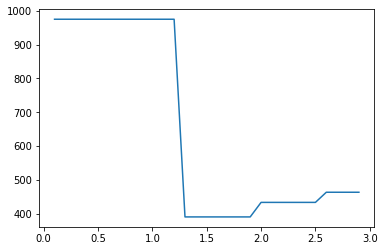

In [61]:
import matplotlib.pyplot as plt
plt.plot(quality_check_df['clip_limit'], quality_check_df['clahe_gc'])

plt.show()

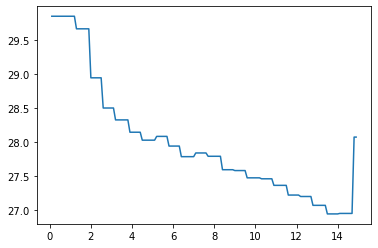

In [29]:
plt.plot(quality_check_df['clip_limit'], quality_check_df['psnr'])
plt.show()

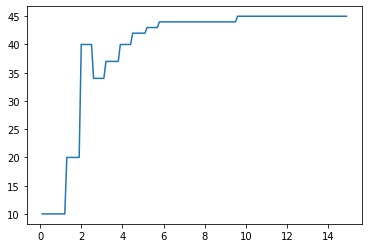

In [30]:
plt.plot(quality_check_df['clip_limit'], quality_check_df['ambe'])
plt.show()

In [23]:
vars()[21]

[5.3219280948873635,
 5.906890595608518,
 6.344698375159712,
 6.682354922057605,
 6.978884897245598,
 7.336297540774119,
 7.522179940758052,
 7.650306619292896,
 7.826880904676474,
 8.169828843471624,
 8.173629684270976,
 8.38191676869314,
 8.513789679422,
 8.585595604031576,
 8.851920131781704,
 8.998334383318511,
 8.690664059532567,
 9.008770694057702,
 9.255272435538721,
 9.286912082863841,
 9.237283659725732,
 9.05491258357932,
 9.147370535487873,
 9.364693459566022,
 9.507536910311929,
 9.66841075138572,
 9.519467761883499,
 9.631851144663393,
 9.471529547509396,
 9.623626772835316,
 9.804799742728196,
 9.604205658152006,
 9.5694791694824,
 9.47802812677519,
 9.763794554748472,
 9.799593486406595,
 9.856504398500613,
 9.957113701295615,
 9.962354681706922,
 9.979681632117956,
 10.131601090145823,
 10.215107248440393,
 10.027419371334842,
 9.94202221743997,
 10.092710620085956,
 10.128139847842926,
 10.04091433267236,
 9.937396427895422,
 9.823932155730272,
 9.600009198523427,
 9.6

In [101]:
global_entropy
#kernel_size_list

[5.3219280948873635,
 5.906890595608518,
 6.320888851350189,
 6.7894977792004605,
 7.031036112553424,
 7.336297540774121,
 7.656315281686811,
 7.832272907237243,
 8.043383709232996,
 8.238563870967926,
 8.446318553349503,
 8.59014247057246,
 8.495574170442652,
 8.824285473369184,
 9.09544122100727,
 9.084845706952532,
 9.012622758216734,
 9.014295753967787,
 9.293568475943752,
 9.294964335469016,
 9.60482206551352,
 9.714636585591734,
 9.66507115334821,
 9.659197696224876,
 9.772412638356116,
 9.656208453837838,
 9.517446597007606,
 9.623167857098919,
 9.691299630489254,
 9.746438772574956,
 9.76929065301496,
 9.818367498802216,
 10.005819993991174,
 10.035354064070894,
 10.17117542788743,
 10.278211351462522,
 10.361784491919304,
 10.341695586737949,
 10.338837429085867,
 10.364122189811873,
 10.398254711617206,
 10.368086477693671,
 10.433500336920194,
 10.399974015166956,
 10.419084629064207,
 10.419454940346041,
 10.440082330354873,
 10.480862791148661,
 10.560673817588995,
 10.590

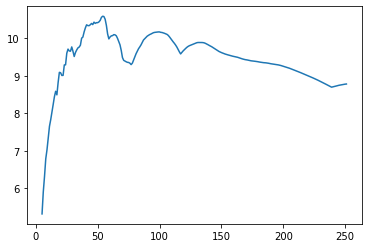

In [102]:
plt.plot(kernel_size_list[:], global_entropy[:])
plt.show()

In [55]:
x = img_gray[j:j+kernel_size, k:k+kernel_size]
x

array([[2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2],
       [2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3],
       [2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2],
       [2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2],
       [2, 2, 2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3, 2, 2],
       [2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2],
       [3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3],
       [2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]], dtype=uint8)

In [39]:
img_gray

array([[1, 3, 5, ..., 4, 4, 4],
       [4, 4, 3, ..., 3, 5, 4],
       [5, 4, 4, ..., 3, 3, 3],
       ...,
       [4, 4, 3, ..., 4, 5, 5],
       [4, 4, 3, ..., 3, 3, 3],
       [4, 3, 4, ..., 4, 4, 4]], dtype=uint8)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(kernel_size_list, global_entropy)
plt.show()

In [7]:
kernel_entropy_list


{'kernel_size 2': 1.96555759893704,
 'kernel_size 3': 3.7411326337458664,
 'kernel_size 4': 4.480427399036928,
 'kernel_size 5': 4.896598587480239,
 'kernel_size 6': 5.472527550503082,
 'kernel_size 7': 6.006977184264085,
 'kernel_size 8': 6.157793975248579,
 'kernel_size 9': 6.319707418239383,
 'kernel_size 10': 6.966446081610564,
 'kernel_size 11': 6.838708744524422,
 'kernel_size 12': 7.051524551712947,
 'kernel_size 14': 7.546046687133559,
 'kernel_size 20': 7.821926950201491,
 'kernel_size 30': 8.662056445797482,
 'kernel_size 40': 8.55747172877147,
 'kernel_size 50': 8.745562577006478}

In [17]:
flatten_img = img_gray.ravel()
intensity_frequency_dict = {}
unique_intensity = list(set(flatten_img))
len_of_unique_intensity = len(unique_intensity)
for i in range(len(flatten_img)):
    try: 
        intensity_frequency_dict[flatten_img[i]] += 1

    except:
        intensity_frequency_dict[flatten_img[i]] = 1

# Finding nomial clipping limit

In [18]:
c = max(list(intensity_frequency_dict.values()))
top = max(list(intensity_frequency_dict.values()))
bottom = min(list(intensity_frequency_dict.values()))
#s = 0
while((top-bottom) > 1):
    middle = (top+bottom)//2
    s = 0
    for i, number_of_intensity in enumerate(intensity_frequency_dict.values()):
        if middle < number_of_intensity:
            #s += list(intensity_frequency_dict.keys())[i]
            #s += 1
            
            # based on bin value
            s += list(intensity_frequency_dict.values())[list(intensity_frequency_dict.keys())[i]]
    if s > ((c-middle)*len_of_unique_intensity):
        top = middle
    else:
        bottom = middle
    

In [19]:
values = list(intensity_frequency_dict.values())
keys = list(intensity_frequency_dict.keys())

In [20]:
print(f"s {s}, c {c}, top {top}, bottom {bottom}, middle {middle}")

s 44102, c 53317, top 53061, bottom 53060, middle 53061


In [15]:
img_gray.shape

(774, 1024)

792576

In [81]:
excess_value = 0
for i, intensity_value in enumerate(values):
    if intensity_value > s: 
        #print(intensity_value-s)
        excess_value += (intensity_value-s)
        values[i] = s 
excess_value        

179504

In [82]:
uniform_level = excess_value/len_of_unique_intensity
uniform_level

701.1875

In [83]:
for i, val in enumerate(values):
    values[i] += uniform_level

In [84]:
len_of_img = len(flatten_img)
pdf_ = [no_of_pixel_of_intensity/len_of_img for no_of_pixel_of_intensity in values]
cdf_=[]
cdf_.append(pdf_[0])
for i, pdf_value in enumerate(pdf_[1:]):
    cdf_.append(cdf_[i-1]+pdf_[i])

max_intensity = max(keys)
cdf_multiply_max_intensity = [cdf_value*max_intensity for cdf_value in cdf_]
round_of_cdf_multiply_max_intensity = [int(np.round(cdf_multiplied_value)) for cdf_multiplied_value in cdf_multiply_max_intensity]

In [85]:
he_dict = {}
for i, val in enumerate(round_of_cdf_multiply_max_intensity):
    try:
        he_dict[val].append(keys[i]) 
    except:
        he_dict[val] = [keys[i]]

In [86]:
list_values = list(he_dict.values())
list_keys = list(he_dict.keys())
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        for k, val2 in enumerate(list_values):
            if img_gray[i,j] in val2:
                img_gray[i,j] = list_keys[k]

In [87]:
lab_planes[0] = img_gray

lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
#clahe_img_gray = cv2.cvtColor(clahe_img, cv2.COLOR_BGR2GRAY)

In [89]:
cv2.imshow("ok", clahe_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Auto Clahe part 2

In [10]:
import cv2
import pandas as pd
import numpy as np
from skimage.feature import greycomatrix # for entropy
from tqdm import tqdm

def auto_clahe(img_gray):
    
    flatten_img = img_gray.ravel()
    #print(flatten_img)
    intensity_frequency_dict = {}
    unique_intensity = list(set(flatten_img))
    len_of_unique_intensity = len(unique_intensity)
    for i in range(len(flatten_img)):
        try: 
            intensity_frequency_dict[flatten_img[i]] += 1

        except:
            intensity_frequency_dict[flatten_img[i]] = 1
    
    values = list(intensity_frequency_dict.values())
    keys = list(intensity_frequency_dict.keys())  
    
    c = max(values)
    top = max(values)
    bottom = 0   #min(values)
    s = 0
    # my experiment start
    #middle = None
    while((top-bottom) > 1):
        #top_minus_bottom_is_less_than_1 = True
        middle = (top+bottom)//2
        middle = middle
        for i, number_of_intensity in enumerate(values):
            if middle < number_of_intensity:
                #s += list(intensity_frequency_dict.keys())[i]
                #s += 1
                s += (values[i]-middle)
        if (s+ middle) > top:
            top = middle
        else:
            bottom = middle 
    
    # experiment end here
    
    max_intensity = max(keys)
    binary_value = [2,4,8,16,32,64,128,256]  
    for i, val in enumerate(binary_value):
        if max_intensity < val:
            max_binary_value = val-1
    '''        
    top_minus_bottom_is_less_than_1 = False        
    while((top-bottom) > 1):
        top_minus_bottom_is_less_than_1 = True
        middle = (top+bottom)//2
        for i, number_of_intensity in enumerate(values):
            if middle < number_of_intensity:
                #s += list(intensity_frequency_dict.keys())[i]
                #s += 1
                s += (values[i]-middle)
        if s > ((c-middle)*len_of_unique_intensity):
            top = middle
        else:
            bottom = middle 
    #if top_minus_bottom_is_less_than_1 == False:
    #    middle = top
    '''    
    excess_value = 0
    for i, intensity_value in enumerate(values):
        if intensity_value > middle: 
            #print(intensity_value-s)
            excess_value += (intensity_value-middle)
            values[i] = middle

    uniform_level = excess_value/len_of_unique_intensity
    uniform_level   

    for i, val in enumerate(values):
        values[i] += uniform_level

    len_of_img = len(flatten_img)
    pdf_ = [no_of_pixel_of_intensity/len_of_img for no_of_pixel_of_intensity in values]
    cdf_=[]
    cdf_.append(pdf_[0])
    for i, pdf_value in enumerate(pdf_[1:]):
        cdf_.append(cdf_[i-1]+pdf_[i])

    cdf_multiply_max_intensity = [cdf_value*max_binary_value for cdf_value in cdf_]
    round_of_cdf_multiply_max_intensity = [int(np.round(cdf_multiplied_value)) for cdf_multiplied_value in cdf_multiply_max_intensity]    

    he_dict = {}
    for i, val in enumerate(round_of_cdf_multiply_max_intensity):
        try:
            he_dict[val].append(keys[i]) 
        except:
            he_dict[val] = [keys[i]]

    list_values = list(he_dict.values())
    list_keys = list(he_dict.keys())
    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            for k, val2 in enumerate(list_values):
                if img_gray[i,j] in val2:
                    img_gray[i,j] = list_keys[k]
    return img_gray                

In [11]:
img_path = '/home/harsh/amk/0df488d86631.jpg'
org_img = cv2.imread(img_path)
img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

img_bgr = cv2.resize(org_img, (512,512))

lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)

img_gray = lab_planes[0]

In [12]:
kernel_size_list = [5]
enhance_img = np.zeros_like(img_gray)
for kernel_size in tqdm(kernel_size_list):
    for j in range(0,img_gray.shape[0],kernel_size):
        for k in range(0, img_gray.shape[1], kernel_size):
            sub_img = auto_clahe(img_gray[j:j+kernel_size, k:k+kernel_size]) 
            for a in range(j, j+sub_img.shape[0]):
                for b in range(k, k+sub_img.shape[1]):
                    enhance_img[a,b] = sub_img[a-j,b-k]

lab_planes[0] = enhance_img

lab = cv2.merge(lab_planes)

clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

cv2.imshow("clahe img", clahe_img)
cv2.imshow("gray img", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()            

  0%|          | 0/1 [00:00<?, ?it/s]


TypeError: '>' not supported between instances of 'int' and 'NoneType'

In [37]:
#img_path = '/home/harsh/amk/0df488d86631.jpg'
org_img = cv2.imread(img_path)
img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

img_bgr = cv2.resize(org_img, (512,512))

lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=3.5,tileGridSize=(5,5))
#lab_planes[0] = clahe.apply(lab_planes[0])

In [35]:
lab_planes[0] 

array([[ 6,  6,  6, ..., 10,  6,  6],
       [ 6,  6,  6, ...,  6,  6,  6],
       [ 6,  6,  6, ...,  6,  6,  6],
       ...,
       [ 6,  6,  6, ...,  6,  6,  6],
       [ 6,  6,  6, ...,  6,  6,  6],
       [ 6,  6,  6, ...,  6,  6,  6]], dtype=uint8)

In [36]:
lab = cv2.merge(lab_planes)

clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

cv2.imshow("clahe img", clahe_img)
cv2.imshow("gray img", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()            

In [38]:
lab_planes[0] 

array([[2, 2, 2, ..., 3, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

In [27]:
enhance_img

array([[2, 2, 2, ..., 7, 2, 2],
       [2, 2, 2, ..., 4, 2, 2],
       [2, 2, 2, ..., 4, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 3, 3],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

In [22]:
img_path = '/home/harsh/amk/0df488d86631.jpg'
org_img = cv2.imread(img_path)
img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray img", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [ ]:
binary_value = [2,4,8,16,32,64,128,256]  
if i, val in enumerate(binary_value):
    if top < val:
        max_binary_value = val-1

In [41]:
lab_planes[0] = enhance_img

lab = cv2.merge(lab_planes)

clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

cv2.imshow("ok", clahe_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
cv2.imshow("ok", clahe_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

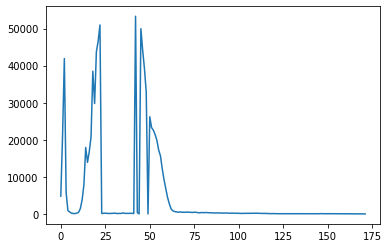

In [90]:
plt.plot(np.arange(172), values)

In [19]:
import cv2
img_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/196234_suren.ch.baruah_01-Jan-1956--7.JPEG'
#img_path = '/home/harsh/amk/0df488d86631.jpg'
bgr = cv2.imread(img_path)


bgr = cv2.resize(bgr, (512,512))

lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=3.2,tileGridSize=(4,4))

lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

cv2.imshow("Clahe image applied", bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [123]:
columns = ["org_entropy", 'clahe_entropy', 'org_sf', 'clahe_sf', 'org_gc', 'clahe_gc', 'ambe' , "image_path"]

In [127]:
d= pd.DataFrame(columns= columns)

In [128]:
d

Empty DataFrame
Columns: [org_entropy, clahe_entropy, org_sf, clahe_sf, org_gc, clahe_gc, org_ambe, clahe_ambe, image_path]
Index: []

In [125]:
import pandas as pd

In [122]:
np.abs(6-7)

1

In [95]:
import cv2
import numpy as np
img_path = '/home/harsh/amk/1.jpg'
org_img = cv2.imread(img_path)
img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

In [119]:

def global_contrast(img_gray):
    flatten_img = img_gray.ravel()
    intensity_frequency_dict = {}
    unique_intensity = list(set(flatten_img))
    len_of_unique_intensity = len(unique_intensity)
    for i in range(len(flatten_img)):
        try: 
            intensity_frequency_dict[flatten_img[i]] += 1

        except:
            intensity_frequency_dict[flatten_img[i]] = 1

    intensity_sum =0
    for intensity in unique_intensity:
        intensity_sum += intensity
    intensity_mean = intensity_sum //len_of_unique_intensity 

    second_central_moment = 0
    for intensity in unique_intensity:
        second_central_moment += (np.square(intensity-intensity_mean)*intensity_frequency_dict[intensity])
    gc = second_central_moment//len(flatten_img)    
    
    return gc

In [120]:
gc = global_contrast(img_gray)
gc

7708

In [108]:
second_central_moment//len(flatten_img)

7708

In [117]:
list(set(flatten_img))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [112]:
"ABSOLUTE MEAN BRIGHTNESS ERROR".lower()

'absolute mean brightness error'

In [105]:
intensity_frequency_dict[1]

3448115

In [103]:
for intensity in list(intensity_frequency_dict.keys()):
    print(intensity)

1
0
2
3
4
5
6
7
8
10
9
12
14
16
17
18
13
15
20
19
22
21
11
25
26
28
35
37
39
38
36
34
33
32
31
30
42
48
52
59
60
61
63
67
69
65
62
66
64
58
56
55
51
45
40
46
43
53
49
29
27
23
24
47
54
68
71
73
74
75
83
86
88
87
85
84
80
79
77
82
96
97
98
100
102
103
93
95
94
92
90
78
72
76
81
57
44
50
41
89
99
104
105
101
91
109
107
108
70
106
115
112
111
110
113
114
116
117
118
123
122
120
125
119
127
128
121
126
133
124
130
131
132
129
134
135
136
137
141
144
138
140
139
142
143
146
148
147
145
151
150
152
149
153
154
155
156
157
158
159
160
162
161
164
163
165
166
169
167
168
170
171
173
172
174
175
176
178
180
181
177
179
182
184
183
186
185
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243


In [101]:
intensity-intensity_mean

122

In [99]:
intensity_mean

121

In [72]:
101735567/792576

128.36064554061693

In [107]:
len(flatten_img)

6869376

In [100]:
intensity_frequency_dict

{1: 3448115,
 0: 4227,
 2: 18383,
 3: 6788,
 4: 3869,
 5: 2399,
 6: 1525,
 7: 1519,
 8: 1017,
 10: 783,
 9: 802,
 12: 452,
 14: 334,
 16: 282,
 17: 270,
 18: 294,
 13: 471,
 15: 360,
 20: 212,
 19: 222,
 22: 209,
 21: 221,
 11: 546,
 25: 185,
 26: 198,
 28: 170,
 35: 170,
 37: 168,
 39: 130,
 38: 153,
 36: 144,
 34: 144,
 33: 155,
 32: 170,
 31: 157,
 30: 167,
 42: 137,
 48: 144,
 52: 124,
 59: 176,
 60: 206,
 61: 219,
 63: 441,
 67: 870,
 69: 1293,
 65: 611,
 62: 299,
 66: 715,
 64: 477,
 58: 164,
 56: 147,
 55: 159,
 51: 147,
 45: 144,
 40: 147,
 46: 133,
 43: 127,
 53: 126,
 49: 144,
 29: 176,
 27: 154,
 23: 218,
 24: 203,
 47: 145,
 54: 154,
 68: 1009,
 71: 1884,
 73: 2558,
 74: 2651,
 75: 2831,
 83: 8565,
 86: 16304,
 88: 21237,
 87: 18858,
 85: 13624,
 84: 10786,
 80: 4674,
 79: 4104,
 77: 3421,
 82: 6874,
 96: 38848,
 97: 41209,
 98: 44013,
 100: 50529,
 102: 53763,
 103: 53934,
 93: 31577,
 95: 36280,
 94: 33808,
 92: 29034,
 90: 24806,
 78: 3634,
 72: 2214,
 76: 3087,
 81: 561

In [60]:
intensity_frequency_dict

{4: 4793,
 5: 21238,
 6: 41917,
 7: 5745,
 8: 882,
 9: 532,
 13: 193,
 21: 109,
 28: 98,
 32: 202,
 33: 445,
 34: 1467,
 35: 3820,
 36: 7951,
 38: 17928,
 37: 13900,
 39: 16818,
 40: 20836,
 42: 38494,
 41: 29769,
 43: 43769,
 44: 46612,
 45: 50972,
 25: 122,
 15: 146,
 3: 199,
 16: 148,
 22: 109,
 27: 141,
 19: 136,
 12: 220,
 30: 146,
 20: 108,
 31: 141,
 24: 126,
 11: 270,
 18: 152,
 26: 128,
 29: 131,
 14: 182,
 17: 141,
 23: 116,
 46: 53317,
 10: 358,
 2: 2,
 47: 49954,
 48: 44102,
 49: 39191,
 50: 32866,
 1: 1,
 51: 26200,
 52: 23283,
 53: 22592,
 54: 21415,
 55: 19827,
 56: 17204,
 57: 15657,
 58: 12177,
 59: 9208,
 60: 6768,
 61: 4414,
 62: 2685,
 63: 1335,
 64: 815,
 65: 635,
 66: 542,
 68: 460,
 67: 535,
 71: 461,
 72: 445,
 69: 470,
 70: 472,
 75: 469,
 76: 430,
 77: 394,
 73: 459,
 74: 453,
 78: 333,
 79: 311,
 80: 376,
 81: 338,
 82: 351,
 83: 378,
 84: 317,
 85: 331,
 86: 278,
 87: 247,
 88: 273,
 89: 248,
 90: 252,
 91: 243,
 92: 220,
 93: 223,
 94: 246,
 95: 222,
 98: 1

In [54]:
def spatial_frequency(img_gray):    
    r_val = 0
    c_val = 0
    rows = img_gray.shape[0]
    columns = img_gray.shape[1]

    for j in range(rows):
    for k in range(1, columns):
        r_val += np.square(img_gray[j][k] - img_gray[j][k-1])

    r = r_val/(rows*columns)


    for k in range(columns):
    for j in range(1, rows):
        c_val += np.square(img_gray[j][k] - img_gray[j-1][k])
    c = c_val/(rows)

    sf = np.sqrt(r+c)
    
    return sf


/home/harsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  
/home/harsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


32.50267317895343


In [46]:
img_gray[-1][1]

4

In [45]:
img_gray

array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       ...,
       [4, 4, 5, ..., 4, 4, 4],
       [4, 4, 5, ..., 4, 4, 4],
       [4, 4, 5, ..., 4, 4, 4]], dtype=uint8)

In [51]:
np.square(3)

9

# bhat2014 research paper implementated

In [1]:
def entropy(img_gray):
    glcm = np.squeeze(greycomatrix(img_gray, distances=[1], 
                                   angles=[0], symmetric=True, 
                                   normed=True))
    entropy = -np.sum(glcm*np.log2(glcm + (glcm==0)))
    
    return entropy

def avg_intensity_func(img):
    img_flatten = img.ravel()
    max_intensity = max(list(set(img_flatten)))
    #min_intensity = min(img_flatten)
    sum_intensity = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum_intensity += (img[i,j]/max_intensity)
    return sum_intensity/len(img_flatten)

def rms_contrast_func(img, avg_intensity):
    img_flatten = img.ravel()
    max_intensity = max(list(set(img_flatten)))
    sum_intensity = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum_intensity += np.square((img[i,j]/max_intensity) - avg_intensity)
    return np.sqrt(sum_intensity/(img.shape[0]*img.shape[1]))            


In [51]:
entropy_val = []
rms_contrast = []
avg_intensity = []
clip_limit = [np.round(i/100, 1) for i in range(10,1000,10)]
img_path = '/home/harsh/amk/Image_Quality_Dataset/Test/Good Quality/D R  P R MAHESHWARI_D_01-01-1963_0165_(0017).jpg'
for j, cl in enumerate(tqdm(clip_limit)):
    org_img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

    img_bgr = cv2.resize(org_img, (512,512))

    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)
    img_gray = lab_planes[0]
    clahe = cv2.createCLAHE(clipLimit=cl,tileGridSize=(30,30))

    #lab_planes[0] = clahe.apply(lab_planes[0])
    clahe_img_gray = clahe.apply(img_gray)
    
    #lab = cv2.merge(lab_planes)     

    #clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    #clahe_img_gray = cv2.cvtColor(lab, cv2.COLOR_BGR2GRAY)
    entropy_val.append(entropy(clahe_img_gray))
    avg_intensity.append(avg_intensity_func(clahe_img_gray))
    rms_contrast.append(rms_contrast_func(clahe_img_gray, avg_intensity[-1]))

  0%|          | 0/99 [00:00<?, ?it/s]


TypeError: 'numpy.float64' object is not callable

In [53]:
x = entropy(clahe_img_gray)

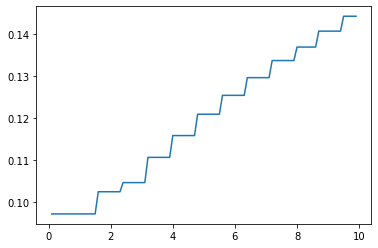

In [33]:
plt.plot(clip_limit,rms_contrast)
plt.show()

In [34]:
rms_contrast

[0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.0972580544905195,
 0.10252341589411253,
 0.10252341589411253,
 0.10252341589411253,
 0.10252341589411253,
 0.10252341589411253,
 0.10252341589411253,
 0.10252341589411253,
 0.10252341589411253,
 0.10469445907870964,
 0.10469445907870964,
 0.10469445907870964,
 0.10469445907870964,
 0.10469445907870964,
 0.10469445907870964,
 0.10469445907870964,
 0.10469445907870964,
 0.11068866571057744,
 0.11068866571057744,
 0.11068866571057744,
 0.11068866571057744,
 0.11068866571057744,
 0.11068866571057744,
 0.11068866571057744,
 0.11068866571057744,
 0.1158671260921382,
 0.1158671260921382,
 0.1158671260921382,
 0.1158671260921382,
 0.1158671260921382,
 0.1158671260921382,
 0.1158671260921382,
 0.1158671

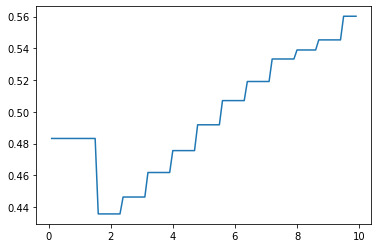

In [22]:
plt.plot(clip_limit,avg_intensity)
plt.show()

In [23]:
avg_intensity

[0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.4831959112391466,
 0.43564906368597534,
 0.43564906368597534,
 0.43564906368597534,
 0.43564906368597534,
 0.43564906368597534,
 0.43564906368597534,
 0.43564906368597534,
 0.43564906368597534,
 0.44629137726141366,
 0.44629137726141366,
 0.44629137726141366,
 0.44629137726141366,
 0.44629137726141366,
 0.44629137726141366,
 0.44629137726141366,
 0.44629137726141366,
 0.4617431860406569,
 0.4617431860406569,
 0.4617431860406569,
 0.4617431860406569,
 0.4617431860406569,
 0.4617431860406569,
 0.4617431860406569,
 0.4617431860406569,
 0.47554234240793036,
 0.47554234240793036,
 0.47554234240793036,
 0.47554234240793036,
 0.47554234240793036,
 0.47554234240793036,
 0.47554234240793036,
 0.47554234

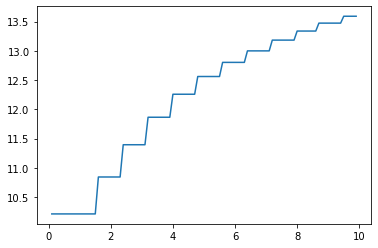

In [24]:
plt.plot(clip_limit, entropy_val)
plt.show()

In [25]:
entropy_val

[10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.210854488256865,
 10.842264709945974,
 10.842264709945974,
 10.842264709945974,
 10.842264709945974,
 10.842264709945974,
 10.842264709945974,
 10.842264709945974,
 10.842264709945974,
 11.393736510059576,
 11.393736510059576,
 11.393736510059576,
 11.393736510059576,
 11.393736510059576,
 11.393736510059576,
 11.393736510059576,
 11.393736510059576,
 11.863863205640355,
 11.863863205640355,
 11.863863205640355,
 11.863863205640355,
 11.863863205640355,
 11.863863205640355,
 11.863863205640355,
 11.863863205640355,
 12.257268101511315,
 12.257268101511315,
 12.257268101511315,
 12.257268101511315,
 12.257268101511315,
 12.257268101511315,
 12.257268101511315,
 12.257268101511315,
 12.560504313

In [5]:
import cv2 
import numpy as np
import pandas as pd
import glob
from tqdm import tqdm
from skimage.feature import greycomatrix # for entropy
import matplotlib.pyplot as plt

org_img = cv2.imread(img_path)
img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

img_bgr = cv2.resize(org_img, (512,512))

lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)
#img_gray = lab_planes[0]
clahe = cv2.createCLAHE(clipLimit=0.3,tileGridSize=(62,62))

lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

clahe_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
concat_img = np.concatenate((img_bgr, clahe_img), axis=1)
cv2.imshow("original image and clahe applied image", concat_img)
#cv2.imshow("Clahe image applied", clahe_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'img_path' is not defined

In [10]:
sum(sum(sum(img_1-img_2)))

0

In [63]:
img_list = glob.glob("/home/harsh/amk/Image_Quality_Dataset/Test/Bad Quality/*")

number_of_min_we_care = 3

columns = ["key_img", "min"]
img_diff = pd.DataFrame(columns = columns)

for i, img_path1 in enumerate(img_list[0:1]):
    sum_list = []
    for j , img_path2 in enumerate(tqdm(img_list)):
        if i != j :
            img1 = cv2.imread(img_path1)
            img1 = cv2.resize(img1, (512, 512))
            img2 = cv2.imread(img_path2)  
            img2 = cv2.resize(img2, (512, 512))
            
            sum_list.append(sum(sum(sum(img1-img2))))
            
            
    sorted_sum_list = list(set(sum_list))          
    loc_list_which_is_min = {}

    for k, val in enumerate(sum_list):
        if val in sorted_sum_list[:number_of_min_we_care]:
            try:
                loc_list_which_is_min[val].append(k) 
            except:
                loc_list_which_is_min[val] = [k]        

    for m, loc in enumerate(loc_list_which_is_min):
        if m ==0:
            img_diff.loc[i, "min"] = [loc, img_list[loc]]
        else:    
            img_diff.loc[i, "min"].append([loc, img_list[loc]])
            
    img_diff.loc[i, "key_img"] = img_path1


100%|██████████| 950/950 [01:52<00:00,  8.42it/s]


TypeError: 'int' object is not iterable

In [48]:
type(img1)

numpy.ndarray

In [52]:
img1_ten = torch.from_numpy(img1)
img2_ten = torch.from_numpy(img2)

In [50]:
import torch

In [62]:
sum(sum(sum(img1_ten-img2_ten))).item()

234

In [56]:
sum(sum(sum(img1-img2)))

234

In [58]:
sum(img1.ravel()-img2.ravel())

106337770